In [1]:
# Cell 1: Imports and class definition
import torch

class UHGTensor(torch.Tensor):
    @staticmethod
    def __new__(cls, *args, **kwargs):
        return super().__new__(cls, *args, **kwargs)

    def __init__(self, *args, **kwargs):
        super().__init__()

    @classmethod
    def point(cls, x, y, z):
        return cls([x, y, z])

    @classmethod
    def line(cls, l, m, n):
        return cls([l, m, n])

    def is_null_point(self):
        return torch.isclose(self[0]**2 + self[1]**2 - self[2]**2, torch.tensor(0.0))

    def quadrance(self, other):
        return 1 - (self.dot(other)**2) / ((self**2).sum() * (other**2).sum())

    def join(self, other):
        return UHGTensor(torch.cross(self, other))

    def to_poincare_disk(self):
        """Convert UHG point to Poincaré disk model."""
        return UHGTensor([self[0] / (1 + self[2]), self[1] / (1 + self[2])])

    def from_poincare_disk(self):
        """Convert Poincaré disk point to UHG point."""
        x, y = self[0], self[1]
        denom = 1 + x**2 + y**2
        return UHGTensor([2*x / denom, 2*y / denom, (-1 + x**2 + y**2) / denom])

    def hyperbolic_distance(self, other):
        """Compute hyperbolic distance in Poincaré disk model."""
        x1, y1 = self.to_poincare_disk()
        x2, y2 = other.to_poincare_disk()
        numer = (x1 - x2)**2 + (y1 - y2)**2
        denom = (1 - x1**2 - y1**2) * (1 - x2**2 - y2**2)
        return 2 * torch.atanh(torch.sqrt(numer / denom))

# Cell 2: Example usage
a1 = UHGTensor.point(1.0, 0.0, 1.0)
a2 = UHGTensor.point(0.0, 1.0, 1.0)
L = a1.join(a2)
q = a1.quadrance(a2)

print("Point a1:", a1)
print("Point a2:", a2)
print("Line L (join of a1 and a2):", L)
print("Quadrance between a1 and a2:", q)

# Cell 3: Poincaré disk conversion and hyperbolic distance
p1 = a1.to_poincare_disk()
p2 = a2.to_poincare_disk()
d = p1.hyperbolic_distance(p2)

print("a1 in Poincaré disk:", p1)
print("a2 in Poincaré disk:", p2)
print("Hyperbolic distance:", d)

# Cell 4: Null point check
null_point = UHGTensor.point(1.0, 1.0, 1.414213562)  # Approximately sqrt(2)
print("Is null point?", null_point.is_null_point())

C:\Users\Service Casket\anaconda3\Lib\site-packages\torch\_tensor.py:1443: UserWarning: Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release. (Triggered internally at C:\b\abs_8f7uhuge1i\croot\pytorch-select_1717607507421\work\aten\src\ATen\native\Cross.cpp:66.)
  ret = func(*args, **kwargs)


Point a1: UHGTensor([1., 0., 1.])
Point a2: UHGTensor([0., 1., 1.])
Line L (join of a1 and a2): UHGTensor([-1., -1.,  1.])
Quadrance between a1 and a2: UHGTensor(0.7500)


IndexError: index 2 is out of bounds for dimension 0 with size 2

In [2]:
# Cell 1: Imports and class definition
import torch

class UHGTensor(torch.Tensor):
    @staticmethod
    def __new__(cls, *args, **kwargs):
        return super().__new__(cls, *args, **kwargs)

    def __init__(self, *args, **kwargs):
        super().__init__()

    @classmethod
    def point(cls, x, y, z):
        return cls([x, y, z])

    @classmethod
    def line(cls, l, m, n):
        return cls([l, m, n])

    def is_null_point(self):
        if self.size(0) != 3:
            raise ValueError("Point must have 3 coordinates")
        return torch.isclose(self[0]**2 + self[1]**2 - self[2]**2, torch.tensor(0.0))

    def quadrance(self, other):
        if self.size(0) != 3 or other.size(0) != 3:
            raise ValueError("Both points must have 3 coordinates")
        return 1 - (self.dot(other)**2) / ((self**2).sum() * (other**2).sum())

    def join(self, other):
        if self.size(0) != 3 or other.size(0) != 3:
            raise ValueError("Both points must have 3 coordinates")
        return UHGTensor(torch.cross(self, other))

    def to_poincare_disk(self):
        """Convert UHG point to Poincaré disk model."""
        if self.size(0) != 3:
            raise ValueError("Point must have 3 coordinates")
        return UHGTensor([self[0] / (1 + self[2]), self[1] / (1 + self[2])])

    def from_poincare_disk(self):
        """Convert Poincaré disk point to UHG point."""
        if self.size(0) != 2:
            raise ValueError("Poincaré disk point must have 2 coordinates")
        x, y = self[0], self[1]
        denom = 1 + x**2 + y**2
        return UHGTensor([2*x / denom, 2*y / denom, (-1 + x**2 + y**2) / denom])

    def hyperbolic_distance(self, other):
        """Compute hyperbolic distance in Poincaré disk model."""
        x1, y1 = self.to_poincare_disk()
        x2, y2 = other.to_poincare_disk()
        numer = (x1 - x2)**2 + (y1 - y2)**2
        denom = (1 - x1**2 - y1**2) * (1 - x2**2 - y2**2)
        return 2 * torch.atanh(torch.sqrt(numer / denom))

# Cell 2: Example usage
a1 = UHGTensor.point(1.0, 0.0, 1.0)
a2 = UHGTensor.point(0.0, 1.0, 1.0)
L = a1.join(a2)
q = a1.quadrance(a2)

print("Point a1:", a1)
print("Point a2:", a2)
print("Line L (join of a1 and a2):", L)
print("Quadrance between a1 and a2:", q)

# Cell 3: Poincaré disk conversion and hyperbolic distance
p1 = a1.to_poincare_disk()
p2 = a2.to_poincare_disk()
d = p1.hyperbolic_distance(p2)

print("a1 in Poincaré disk:", p1)
print("a2 in Poincaré disk:", p2)
print("Hyperbolic distance:", d)

# Cell 4: Null point check
null_point = UHGTensor.point(1.0, 1.0, 1.414213562)  # Approximately sqrt(2)
print("Is null point?", null_point.is_null_point())

Point a1: UHGTensor([1., 0., 1.])
Point a2: UHGTensor([0., 1., 1.])
Line L (join of a1 and a2): UHGTensor([-1., -1.,  1.])
Quadrance between a1 and a2: UHGTensor(0.7500)


ValueError: Point must have 3 coordinates

In [3]:
# Cell 1: Imports and class definition
import torch

class UHGTensor(torch.Tensor):
    @staticmethod
    def __new__(cls, *args, **kwargs):
        return super().__new__(cls, *args, **kwargs)

    def __init__(self, *args, **kwargs):
        super().__init__()

    @classmethod
    def point(cls, x, y, z):
        point = cls([float(x), float(y), float(z)])
        print(f"Created point with shape {point.shape}: {point}")
        return point

    @classmethod
    def line(cls, l, m, n):
        line = cls([float(l), float(m), float(n)])
        print(f"Created line with shape {line.shape}: {line}")
        return line

    def is_null_point(self):
        print(f"Checking if null point: shape {self.shape}, values {self}")
        if self.size(0) != 3:
            raise ValueError(f"Point must have 3 coordinates, got {self.size(0)}")
        return torch.isclose(self[0]**2 + self[1]**2 - self[2]**2, torch.tensor(0.0))

    def quadrance(self, other):
        print(f"Computing quadrance between {self} and {other}")
        if self.size(0) != 3 or other.size(0) != 3:
            raise ValueError(f"Both points must have 3 coordinates, got {self.size(0)} and {other.size(0)}")
        return 1 - (self.dot(other)**2) / ((self**2).sum() * (other**2).sum())

    def join(self, other):
        print(f"Computing join of {self} and {other}")
        if self.size(0) != 3 or other.size(0) != 3:
            raise ValueError(f"Both points must have 3 coordinates, got {self.size(0)} and {other.size(0)}")
        return UHGTensor(torch.cross(self, other))

    def to_poincare_disk(self):
        print(f"Converting to Poincaré disk: {self}")
        if self.size(0) != 3:
            raise ValueError(f"Point must have 3 coordinates, got {self.size(0)}")
        return UHGTensor([self[0] / (1 + self[2]), self[1] / (1 + self[2])])

    def hyperbolic_distance(self, other):
        print(f"Computing hyperbolic distance between {self} and {other}")
        x1, y1 = self.to_poincare_disk()
        x2, y2 = other.to_poincare_disk()
        numer = (x1 - x2)**2 + (y1 - y2)**2
        denom = (1 - x1**2 - y1**2) * (1 - x2**2 - y2**2)
        return 2 * torch.atanh(torch.sqrt(numer / denom))

# Cell 2: Example usage
print("Creating points a1 and a2:")
a1 = UHGTensor.point(1.0, 0.0, 1.0)
a2 = UHGTensor.point(0.0, 1.0, 1.0)

print("\nComputing join and quadrance:")
L = a1.join(a2)
q = a1.quadrance(a2)

print(f"\nPoint a1: {a1}")
print(f"Point a2: {a2}")
print(f"Line L (join of a1 and a2): {L}")
print(f"Quadrance between a1 and a2: {q}")

# Cell 3: Poincaré disk conversion and hyperbolic distance
print("\nConverting to Poincaré disk and computing hyperbolic distance:")
p1 = a1.to_poincare_disk()
p2 = a2.to_poincare_disk()
d = p1.hyperbolic_distance(p2)

print(f"a1 in Poincaré disk: {p1}")
print(f"a2 in Poincaré disk: {p2}")
print(f"Hyperbolic distance: {d}")

# Cell 4: Null point check
print("\nChecking for null point:")
null_point = UHGTensor.point(1.0, 1.0, 1.414213562)  # Approximately sqrt(2)
is_null = null_point.is_null_point()
print(f"Is null point? {is_null}")

Creating points a1 and a2:
Created point with shape torch.Size([3]): UHGTensor([1., 0., 1.])
Created point with shape torch.Size([3]): UHGTensor([0., 1., 1.])

Computing join and quadrance:
Computing join of UHGTensor([1., 0., 1.]) and UHGTensor([0., 1., 1.])
Computing quadrance between UHGTensor([1., 0., 1.]) and UHGTensor([0., 1., 1.])

Point a1: UHGTensor([1., 0., 1.])
Point a2: UHGTensor([0., 1., 1.])
Line L (join of a1 and a2): UHGTensor([-1., -1.,  1.])
Quadrance between a1 and a2: UHGTensor(0.7500)

Converting to Poincaré disk and computing hyperbolic distance:
Converting to Poincaré disk: UHGTensor([1., 0., 1.])
Converting to Poincaré disk: UHGTensor([0., 1., 1.])
Computing hyperbolic distance between UHGTensor([0.5000, 0.0000]) and UHGTensor([0.0000, 0.5000])
Converting to Poincaré disk: UHGTensor([0.5000, 0.0000])


ValueError: Point must have 3 coordinates, got 2

In [4]:
import torch

class UHGTensor(torch.Tensor):
    @staticmethod
    def __new__(cls, *args, **kwargs):
        tensor = super().__new__(cls, *args, **kwargs)
        print(f"__new__ called: created tensor with shape {tensor.shape}")
        return tensor

    def __init__(self, *args, **kwargs):
        super().__init__()
        print(f"__init__ called: self has shape {self.shape}")

    @classmethod
    def point(cls, x, y, z):
        point = cls([float(x), float(y), float(z)])
        print(f"Created point with shape {point.shape}: {point}")
        return point

    @classmethod
    def line(cls, l, m, n):
        line = cls([float(l), float(m), float(n)])
        print(f"Created line with shape {line.shape}: {line}")
        return line

    def is_null_point(self):
        print(f"is_null_point called on tensor with shape {self.shape}: {self}")
        if self.size(0) != 3:
            raise ValueError(f"Point must have 3 coordinates, got {self.size(0)}")
        return torch.isclose(self[0]**2 + self[1]**2 - self[2]**2, torch.tensor(0.0))

    def quadrance(self, other):
        print(f"quadrance called with self shape {self.shape} and other shape {other.shape}")
        if self.size(0) != 3 or other.size(0) != 3:
            raise ValueError(f"Both points must have 3 coordinates, got {self.size(0)} and {other.size(0)}")
        return 1 - (self.dot(other)**2) / ((self**2).sum() * (other**2).sum())

    def join(self, other):
        print(f"join called with self shape {self.shape} and other shape {other.shape}")
        if self.size(0) != 3 or other.size(0) != 3:
            raise ValueError(f"Both points must have 3 coordinates, got {self.size(0)} and {other.size(0)}")
        result = UHGTensor(torch.cross(self, other))
        print(f"join result shape: {result.shape}")
        return result

    def to_poincare_disk(self):
        print(f"to_poincare_disk called on tensor with shape {self.shape}: {self}")
        if self.size(0) != 3:
            raise ValueError(f"Point must have 3 coordinates, got {self.size(0)}")
        result = UHGTensor([self[0] / (1 + self[2]), self[1] / (1 + self[2])])
        print(f"to_poincare_disk result shape: {result.shape}")
        return result

    def hyperbolic_distance(self, other):
        print(f"hyperbolic_distance called with self shape {self.shape} and other shape {other.shape}")
        x1, y1 = self.to_poincare_disk()
        x2, y2 = other.to_poincare_disk()
        numer = (x1 - x2)**2 + (y1 - y2)**2
        denom = (1 - x1**2 - y1**2) * (1 - x2**2 - y2**2)
        return 2 * torch.atanh(torch.sqrt(numer / denom))

print("Creating points a1 and a2:")
a1 = UHGTensor.point(1.0, 0.0, 1.0)
a2 = UHGTensor.point(0.0, 1.0, 1.0)

print("\nComputing join and quadrance:")
L = a1.join(a2)
q = a1.quadrance(a2)

print(f"\nPoint a1: {a1}, shape: {a1.shape}")
print(f"Point a2: {a2}, shape: {a2.shape}")
print(f"Line L (join of a1 and a2): {L}, shape: {L.shape}")
print(f"Quadrance between a1 and a2: {q}")

print("\nConverting to Poincaré disk and computing hyperbolic distance:")
p1 = a1.to_poincare_disk()
p2 = a2.to_poincare_disk()
d = p1.hyperbolic_distance(p2)

print(f"a1 in Poincaré disk: {p1}, shape: {p1.shape}")
print(f"a2 in Poincaré disk: {p2}, shape: {p2.shape}")
print(f"Hyperbolic distance: {d}")

print("\nChecking for null point:")
null_point = UHGTensor.point(1.0, 1.0, 1.414213562)  # Approximately sqrt(2)
is_null = null_point.is_null_point()
print(f"Is null point? {is_null}")

Creating points a1 and a2:
__new__ called: created tensor with shape torch.Size([3])
__init__ called: self has shape torch.Size([3])
Created point with shape torch.Size([3]): UHGTensor([1., 0., 1.])
__new__ called: created tensor with shape torch.Size([3])
__init__ called: self has shape torch.Size([3])
Created point with shape torch.Size([3]): UHGTensor([0., 1., 1.])

Computing join and quadrance:
join called with self shape torch.Size([3]) and other shape torch.Size([3])
__new__ called: created tensor with shape torch.Size([3])
__init__ called: self has shape torch.Size([3])
join result shape: torch.Size([3])
quadrance called with self shape torch.Size([3]) and other shape torch.Size([3])

Point a1: UHGTensor([1., 0., 1.]), shape: torch.Size([3])
Point a2: UHGTensor([0., 1., 1.]), shape: torch.Size([3])
Line L (join of a1 and a2): UHGTensor([-1., -1.,  1.]), shape: torch.Size([3])
Quadrance between a1 and a2: UHGTensor(0.7500)

Converting to Poincaré disk and computing hyperbolic dis

ValueError: Point must have 3 coordinates, got 2

In [5]:
import torch

class UHGTensor:
    def __init__(self, data):
        if isinstance(data, (list, tuple)) and len(data) == 3:
            self.tensor = torch.tensor(data, dtype=torch.float32)
        elif isinstance(data, torch.Tensor) and data.shape == (3,):
            self.tensor = data
        else:
            raise ValueError(f"Expected 3 coordinates, got {data}")
        print(f"Created UHGTensor with shape {self.tensor.shape}: {self.tensor}")

    @classmethod
    def point(cls, x, y, z):
        return cls([float(x), float(y), float(z)])

    @classmethod
    def line(cls, l, m, n):
        return cls([float(l), float(m), float(n)])

    def is_null_point(self):
        print(f"Checking if null point: {self.tensor}")
        return torch.isclose(self.tensor[0]**2 + self.tensor[1]**2 - self.tensor[2]**2, torch.tensor(0.0))

    def quadrance(self, other):
        print(f"Computing quadrance between {self.tensor} and {other.tensor}")
        return 1 - (self.tensor.dot(other.tensor)**2) / ((self.tensor**2).sum() * (other.tensor**2).sum())

    def join(self, other):
        print(f"Computing join of {self.tensor} and {other.tensor}")
        return UHGTensor(torch.cross(self.tensor, other.tensor))

    def to_poincare_disk(self):
        print(f"Converting to Poincaré disk: {self.tensor}")
        return UHGTensor([self.tensor[0] / (1 + self.tensor[2]), self.tensor[1] / (1 + self.tensor[2]), 0.0])

    def hyperbolic_distance(self, other):
        print(f"Computing hyperbolic distance between {self.tensor} and {other.tensor}")
        p1 = self.to_poincare_disk()
        p2 = other.to_poincare_disk()
        x1, y1, _ = p1.tensor
        x2, y2, _ = p2.tensor
        numer = (x1 - x2)**2 + (y1 - y2)**2
        denom = (1 - x1**2 - y1**2) * (1 - x2**2 - y2**2)
        return 2 * torch.atanh(torch.sqrt(numer / denom))

    def __repr__(self):
        return f"UHGTensor({self.tensor.tolist()})"

print("Creating points a1 and a2:")
a1 = UHGTensor.point(1.0, 0.0, 1.0)
a2 = UHGTensor.point(0.0, 1.0, 1.0)

print("\nComputing join and quadrance:")
L = a1.join(a2)
q = a1.quadrance(a2)

print(f"\nPoint a1: {a1}")
print(f"Point a2: {a2}")
print(f"Line L (join of a1 and a2): {L}")
print(f"Quadrance between a1 and a2: {q}")

print("\nConverting to Poincaré disk and computing hyperbolic distance:")
p1 = a1.to_poincare_disk()
p2 = a2.to_poincare_disk()
d = a1.hyperbolic_distance(a2)

print(f"a1 in Poincaré disk: {p1}")
print(f"a2 in Poincaré disk: {p2}")
print(f"Hyperbolic distance: {d}")

print("\nChecking for null point:")
null_point = UHGTensor.point(1.0, 1.0, 1.414213562)  # Approximately sqrt(2)
is_null = null_point.is_null_point()
print(f"Is null point? {is_null}")

Creating points a1 and a2:
Created UHGTensor with shape torch.Size([3]): tensor([1., 0., 1.])
Created UHGTensor with shape torch.Size([3]): tensor([0., 1., 1.])

Computing join and quadrance:
Computing join of tensor([1., 0., 1.]) and tensor([0., 1., 1.])
Created UHGTensor with shape torch.Size([3]): tensor([-1., -1.,  1.])
Computing quadrance between tensor([1., 0., 1.]) and tensor([0., 1., 1.])

Point a1: UHGTensor([1.0, 0.0, 1.0])
Point a2: UHGTensor([0.0, 1.0, 1.0])
Line L (join of a1 and a2): UHGTensor([-1.0, -1.0, 1.0])
Quadrance between a1 and a2: 0.75

Converting to Poincaré disk and computing hyperbolic distance:
Converting to Poincaré disk: tensor([1., 0., 1.])
Created UHGTensor with shape torch.Size([3]): tensor([0.5000, 0.0000, 0.0000])
Converting to Poincaré disk: tensor([0., 1., 1.])
Created UHGTensor with shape torch.Size([3]): tensor([0.0000, 0.5000, 0.0000])
Computing hyperbolic distance between tensor([1., 0., 1.]) and tensor([0., 1., 1.])
Converting to Poincaré disk:

In [6]:
def triple_quad_formula(a1, a2, a3):
    # Calculate the quadrances between each pair of points
    q1 = a2.quadrance(a3)
    q2 = a1.quadrance(a3)
    q3 = a1.quadrance(a2)
    
    # Calculate the left-hand side of the equation
    lhs = (q1 + q2 + q3)**2
    
    # Calculate the right-hand side of the equation
    rhs = 2 * (q1**2 + q2**2 + q3**2) + 4 * q1 * q2 * q3
    
    # Check if the left-hand side is equal to the right-hand side
    # We use isclose() because floating-point arithmetic can introduce small errors
    return torch.isclose(lhs, rhs)

# Example usage
a1 = UHGTensor.point(1.0, 0.0, 1.0)
a2 = UHGTensor.point(0.0, 1.0, 1.0)
a3 = UHGTensor.point(1.0, 1.0, 1.0)

result = triple_quad_formula(a1, a2, a3)
print(f"Triple quad formula holds: {result}")

Created UHGTensor with shape torch.Size([3]): tensor([1., 0., 1.])
Created UHGTensor with shape torch.Size([3]): tensor([0., 1., 1.])
Created UHGTensor with shape torch.Size([3]): tensor([1., 1., 1.])
Computing quadrance between tensor([0., 1., 1.]) and tensor([1., 1., 1.])
Computing quadrance between tensor([1., 0., 1.]) and tensor([1., 1., 1.])
Computing quadrance between tensor([1., 0., 1.]) and tensor([0., 1., 1.])
Triple quad formula holds: False


In [7]:
# Choose three collinear points
a1 = UHGTensor.point(1.0, 0.0, 1.0)
a2 = UHGTensor.point(2.0, 0.0, 1.0)
a3 = UHGTensor.point(3.0, 0.0, 1.0)

result = triple_quad_formula(a1, a2, a3)
print(f"Triple quad formula holds for collinear points: {result}")

# For comparison, let's also test with our original non-collinear points
b1 = UHGTensor.point(1.0, 0.0, 1.0)
b2 = UHGTensor.point(0.0, 1.0, 1.0)
b3 = UHGTensor.point(1.0, 1.0, 1.0)

result_non_collinear = triple_quad_formula(b1, b2, b3)
print(f"Triple quad formula holds for non-collinear points: {result_non_collinear}")

Created UHGTensor with shape torch.Size([3]): tensor([1., 0., 1.])
Created UHGTensor with shape torch.Size([3]): tensor([2., 0., 1.])
Created UHGTensor with shape torch.Size([3]): tensor([3., 0., 1.])
Computing quadrance between tensor([2., 0., 1.]) and tensor([3., 0., 1.])
Computing quadrance between tensor([1., 0., 1.]) and tensor([3., 0., 1.])
Computing quadrance between tensor([1., 0., 1.]) and tensor([2., 0., 1.])
Triple quad formula holds for collinear points: True
Created UHGTensor with shape torch.Size([3]): tensor([1., 0., 1.])
Created UHGTensor with shape torch.Size([3]): tensor([0., 1., 1.])
Created UHGTensor with shape torch.Size([3]): tensor([1., 1., 1.])
Computing quadrance between tensor([0., 1., 1.]) and tensor([1., 1., 1.])
Computing quadrance between tensor([1., 0., 1.]) and tensor([1., 1., 1.])
Computing quadrance between tensor([1., 0., 1.]) and tensor([0., 1., 1.])
Triple quad formula holds for non-collinear points: False


In [8]:
def spread(L1, L2):
    # Compute the dot product of L1 and L2
    dot_product = L1.tensor.dot(L2.tensor)
    
    # Compute the squared norms of L1 and L2
    norm_L1_squared = (L1.tensor**2).sum()
    norm_L2_squared = (L2.tensor**2).sum()
    
    # Compute the spread
    S = 1 - (dot_product**2) / (norm_L1_squared * norm_L2_squared)
    
    return S

# Example usage
L1 = UHGTensor.line(1.0, 0.0, 0.0)  # Line along x-axis
L2 = UHGTensor.line(0.0, 1.0, 0.0)  # Line along y-axis

S = spread(L1, L2)
print(f"Spread between L1 and L2: {S}")

# Let's also try with lines that aren't perpendicular
L3 = UHGTensor.line(1.0, 1.0, 0.0)  # Line y = x
S_2 = spread(L1, L3)
print(f"Spread between L1 and L3: {S_2}")

Created UHGTensor with shape torch.Size([3]): tensor([1., 0., 0.])
Created UHGTensor with shape torch.Size([3]): tensor([0., 1., 0.])
Spread between L1 and L2: 1.0
Created UHGTensor with shape torch.Size([3]): tensor([1., 1., 0.])
Spread between L1 and L3: 0.5


In [9]:
def cross_law(a1, a2, a3):
    # Calculate the quadrances
    q1 = a2.quadrance(a3)
    q2 = a1.quadrance(a3)
    q3 = a1.quadrance(a2)
    
    # Calculate the spread
    L1 = a1.join(a2)
    L2 = a1.join(a3)
    S1 = spread(L1, L2)
    
    # Calculate left-hand side of the equation
    lhs = (q2 * q3 * S1 - q1 - q2 - q3 + 2)**2
    
    # Calculate right-hand side of the equation
    rhs = 4 * (1 - q1) * (1 - q2) * (1 - q3)
    
    # Check if the equation holds
    return torch.isclose(lhs, rhs)

# Example usage
a1 = UHGTensor.point(1.0, 0.0, 1.0)
a2 = UHGTensor.point(0.0, 1.0, 1.0)
a3 = UHGTensor.point(2.0, 2.0, 3.0)

result = cross_law(a1, a2, a3)
print(f"Cross law holds: {result}")

Created UHGTensor with shape torch.Size([3]): tensor([1., 0., 1.])
Created UHGTensor with shape torch.Size([3]): tensor([0., 1., 1.])
Created UHGTensor with shape torch.Size([3]): tensor([2., 2., 3.])
Computing quadrance between tensor([0., 1., 1.]) and tensor([2., 2., 3.])
Computing quadrance between tensor([1., 0., 1.]) and tensor([2., 2., 3.])
Computing quadrance between tensor([1., 0., 1.]) and tensor([0., 1., 1.])
Computing join of tensor([1., 0., 1.]) and tensor([0., 1., 1.])
Created UHGTensor with shape torch.Size([3]): tensor([-1., -1.,  1.])
Computing join of tensor([1., 0., 1.]) and tensor([2., 2., 3.])
Created UHGTensor with shape torch.Size([3]): tensor([-2., -1.,  2.])
Cross law holds: True


Created UHGTensor with shape torch.Size([3]): tensor([1., 0., 1.])
Created UHGTensor with shape torch.Size([3]): tensor([0., 1., 1.])
Created UHGTensor with shape torch.Size([3]): tensor([0.5000, 0.5000, 1.0000])


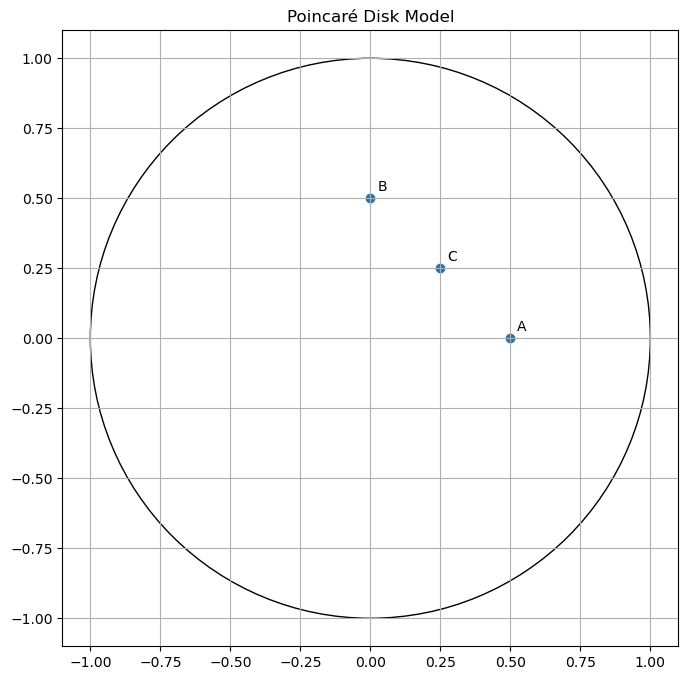

In [10]:
import torch
import matplotlib.pyplot as plt

def to_poincare_disk(point):
    """Convert a UHG point to Poincaré disk coordinates."""
    x, y, z = point.tensor
    return torch.tensor([x / (1 + z), y / (1 + z)])

def plot_poincare_disk(points, labels=None):
    """Plot points in the Poincaré disk model."""
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Draw the unit circle
    circle = plt.Circle((0, 0), 1, fill=False)
    ax.add_artist(circle)
    
    # Convert points to Poincaré disk coordinates and plot
    poincare_points = [to_poincare_disk(p) for p in points]
    x_coords = [p[0].item() for p in poincare_points]
    y_coords = [p[1].item() for p in poincare_points]
    ax.scatter(x_coords, y_coords)
    
    # Add labels if provided
    if labels:
        for i, (x, y) in enumerate(zip(x_coords, y_coords)):
            ax.annotate(labels[i], (x, y), xytext=(5, 5), textcoords='offset points')
    
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal')
    ax.set_title("Poincaré Disk Model")
    plt.grid(True)
    plt.show()

# Example usage
a = UHGTensor.point(1.0, 0.0, 1.0)
b = UHGTensor.point(0.0, 1.0, 1.0)
c = UHGTensor.point(0.5, 0.5, 1.0)

plot_poincare_disk([a, b, c], labels=['A', 'B', 'C'])

Created UHGTensor with shape torch.Size([3]): tensor([0.5000, 0.0000, 1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([0.0000, 0.5000, 1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([-0.5000,  0.0000,  1.0000])


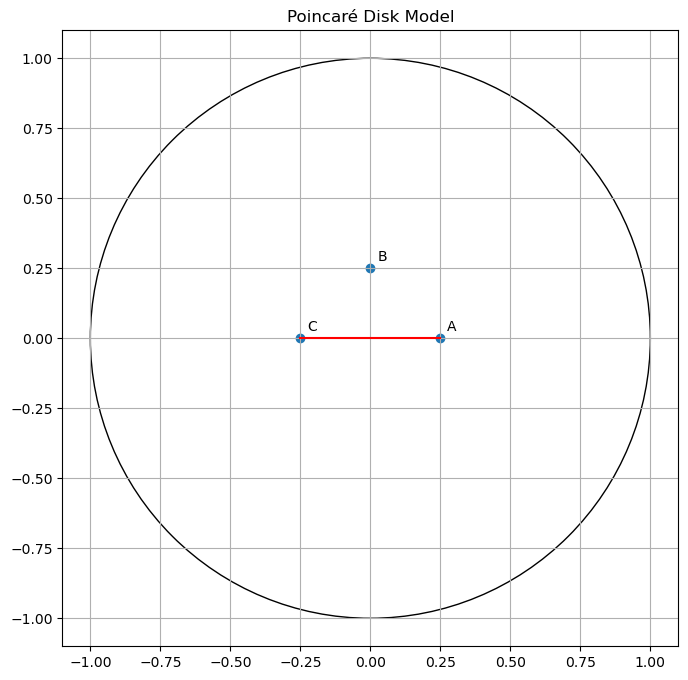

In [14]:
# Add these imports at the top of uhg.py
import numpy as np
from matplotlib.patches import Arc

# Add these new functions to uhg.py

def geodesic_endpoints(p1, p2):
    """Calculate the endpoints of a geodesic line in the Poincaré disk model."""
    x1, y1 = p1
    x2, y2 = p2
    
    # If the points are on a straight line through the origin
    if abs(x1*y2 - x2*y1) < 1e-6:
        return np.array([x1, y1]), np.array([x2, y2])
    
    # Otherwise, calculate the circle parameters
    d = x1**2 + y1**2
    c = x2**2 + y2**2 - d
    a = 2*(x2*y1 - x1*y2)
    
    x0 = (c*y1 - (d-1)*y2) / a
    y0 = ((d-1)*x2 - c*x1) / a
    r = np.sqrt((x1-x0)**2 + (y1-y0)**2)
    
    # Calculate intersection points with the unit circle
    t = np.sqrt(x0**2 + y0**2 - 1)
    x_int1, x_int2 = (x0*(1-t**2) + 2*t*y0) / (1+t**2), (x0*(1-t**2) - 2*t*y0) / (1+t**2)
    y_int1, y_int2 = (y0*(1-t**2) - 2*t*x0) / (1+t**2), (y0*(1-t**2) + 2*t*x0) / (1+t**2)
    
    return np.array([x_int1, y_int1]), np.array([x_int2, y_int2])

def plot_poincare_disk(points, lines=None, labels=None):
    """Plot points and lines in the Poincaré disk model."""
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Draw the unit circle
    circle = plt.Circle((0, 0), 1, fill=False)
    ax.add_artist(circle)
    
    # Convert points to Poincaré disk coordinates and plot
    poincare_points = [to_poincare_disk(p) for p in points]
    x_coords = [p[0].item() for p in poincare_points]
    y_coords = [p[1].item() for p in poincare_points]
    ax.scatter(x_coords, y_coords)
    
    # Add labels if provided
    if labels:
        for i, (x, y) in enumerate(zip(x_coords, y_coords)):
            ax.annotate(labels[i], (x, y), xytext=(5, 5), textcoords='offset points')
    
    # Draw lines if provided
    if lines:
        for line in lines:
            p1, p2 = to_poincare_disk(line[0]), to_poincare_disk(line[1])
            start, end = geodesic_endpoints(p1, p2)
            
            # If it's a straight line
            if np.allclose(start, p1.numpy()) and np.allclose(end, p2.numpy()):
                ax.plot([start[0], end[0]], [start[1], end[1]], 'r-')
            else:
                center = (start + end) / 2
                radius = np.linalg.norm(start - center)
                angle = np.degrees(np.arctan2(end[1]-start[1], end[0]-start[0]))
                arc = Arc(center, 2*radius, 2*radius, angle=angle, 
                          theta1=0, theta2=180, color='r')
                ax.add_patch(arc)
    
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal')
    ax.set_title("Poincaré Disk Model")
    plt.grid(True)
    plt.show()

# Example usage (you can put this in a separate file)
if __name__ == "__main__":
    a = UHGTensor.point(0.5, 0.0, 1.0)
    b = UHGTensor.point(0.0, 0.5, 1.0)
    c = UHGTensor.point(-0.5, 0.0, 1.0)

    points = [a, b, c]
    lines = [(a, b), (b, c), (c, a)]
    labels = ['A', 'B', 'C']

    plot_poincare_disk(points, lines, labels)

Created UHGTensor with shape torch.Size([3]): tensor([0.5000, 0.0000, 1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([0.0000, 0.5000, 1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([-0.3000, -0.4000,  1.0000])
Computing quadrance between tensor([0.0000, 0.5000, 1.0000]) and tensor([-0.3000, -0.4000,  1.0000])
Computing quadrance between tensor([0.5000, 0.0000, 1.0000]) and tensor([-0.3000, -0.4000,  1.0000])
Computing quadrance between tensor([0.5000, 0.0000, 1.0000]) and tensor([0.0000, 0.5000, 1.0000])
Computing join of tensor([0.5000, 0.0000, 1.0000]) and tensor([0.0000, 0.5000, 1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([-0.5000, -0.5000,  0.2500])
Computing join of tensor([0.5000, 0.0000, 1.0000]) and tensor([-0.3000, -0.4000,  1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([ 0.4000, -0.8000, -0.2000])
Computing join of tensor([0.0000, 0.5000, 1.0000]) and tensor([0.5000, 0.0000, 1.0000])
Created UHGTensor with shape 

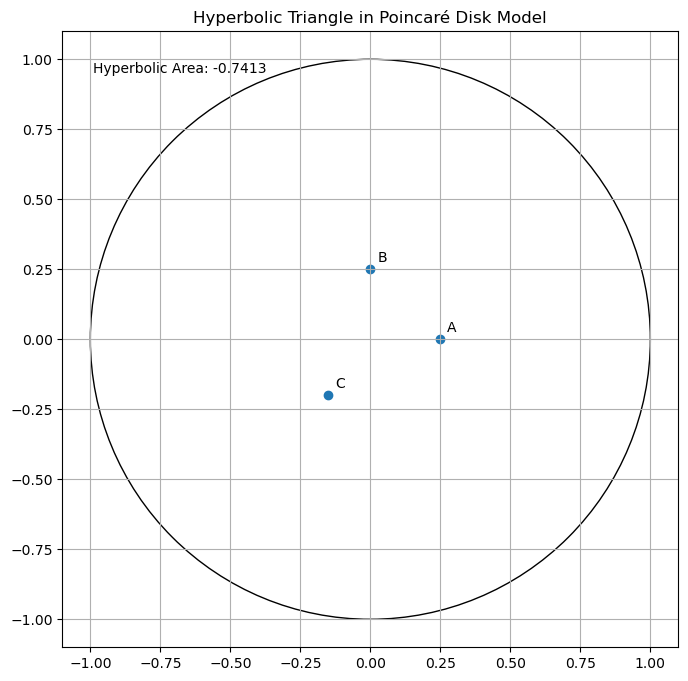

Created UHGTensor with shape torch.Size([3]): tensor([0.8000, 0.0000, 1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([0.0000, 0.8000, 1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([-0.7000, -0.6000,  1.0000])
Computing quadrance between tensor([0.0000, 0.8000, 1.0000]) and tensor([-0.7000, -0.6000,  1.0000])
Computing quadrance between tensor([0.8000, 0.0000, 1.0000]) and tensor([-0.7000, -0.6000,  1.0000])
Computing quadrance between tensor([0.8000, 0.0000, 1.0000]) and tensor([0.0000, 0.8000, 1.0000])
Computing join of tensor([0.8000, 0.0000, 1.0000]) and tensor([0.0000, 0.8000, 1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([-0.8000, -0.8000,  0.6400])
Computing join of tensor([0.8000, 0.0000, 1.0000]) and tensor([-0.7000, -0.6000,  1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([ 0.6000, -1.5000, -0.4800])
Computing join of tensor([0.0000, 0.8000, 1.0000]) and tensor([0.8000, 0.0000, 1.0000])
Created UHGTensor with shape 

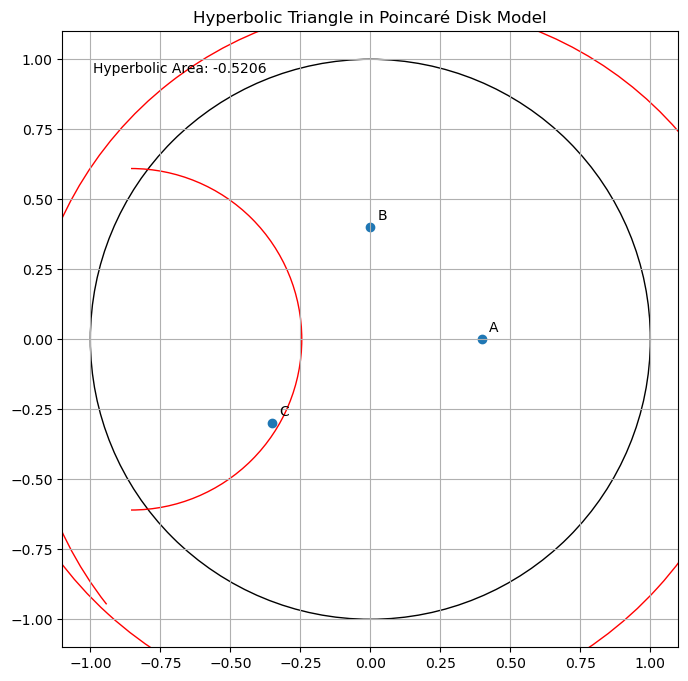

In [12]:
# Add these new functions to uhg.py

def hyperbolic_triangle_area(a, b, c):
    """Calculate the area of a hyperbolic triangle."""
    q1 = b.quadrance(c)
    q2 = a.quadrance(c)
    q3 = a.quadrance(b)
    
    S1 = spread(a.join(b), a.join(c))
    S2 = spread(b.join(a), b.join(c))
    S3 = spread(c.join(a), c.join(b))
    
    # Use the hyperbolic excess formula
    excess = S1 + S2 + S3 - np.pi
    return excess

def plot_hyperbolic_triangle(a, b, c):
    """Plot a hyperbolic triangle in the Poincaré disk model."""
    points = [a, b, c]
    lines = [(a, b), (b, c), (c, a)]
    labels = ['A', 'B', 'C']
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Draw the unit circle
    circle = plt.Circle((0, 0), 1, fill=False)
    ax.add_artist(circle)
    
    # Convert points to Poincaré disk coordinates and plot
    poincare_points = [to_poincare_disk(p) for p in points]
    x_coords = [p[0].item() for p in poincare_points]
    y_coords = [p[1].item() for p in poincare_points]
    ax.scatter(x_coords, y_coords)
    
    # Add labels
    for i, (x, y) in enumerate(zip(x_coords, y_coords)):
        ax.annotate(labels[i], (x, y), xytext=(5, 5), textcoords='offset points')
    
    # Draw lines
    for line in lines:
        p1, p2 = to_poincare_disk(line[0]), to_poincare_disk(line[1])
        start, end = geodesic_endpoints(p1, p2)
        
        if np.allclose(start, p1.numpy()) and np.allclose(end, p2.numpy()):
            ax.plot([start[0], end[0]], [start[1], end[1]], 'r-')
        else:
            center = (start + end) / 2
            radius = np.linalg.norm(start - center)
            angle = np.degrees(np.arctan2(end[1]-start[1], end[0]-start[0]))
            arc = Arc(center, 2*radius, 2*radius, angle=angle, 
                      theta1=0, theta2=180, color='r')
            ax.add_patch(arc)
    
    # Calculate and display the hyperbolic area
    area = hyperbolic_triangle_area(a, b, c)
    ax.text(0.05, 0.95, f'Hyperbolic Area: {area:.4f}', transform=ax.transAxes, 
            verticalalignment='top')
    
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal')
    ax.set_title("Hyperbolic Triangle in Poincaré Disk Model")
    plt.grid(True)
    plt.show()

# Example usage (you can put this in a separate file)
if __name__ == "__main__":
    a = UHGTensor.point(0.5, 0.0, 1.0)
    b = UHGTensor.point(0.0, 0.5, 1.0)
    c = UHGTensor.point(-0.3, -0.4, 1.0)

    plot_hyperbolic_triangle(a, b, c)

    # Compare with a triangle closer to the boundary
    d = UHGTensor.point(0.8, 0.0, 1.0)
    e = UHGTensor.point(0.0, 0.8, 1.0)
    f = UHGTensor.point(-0.7, -0.6, 1.0)

    plot_hyperbolic_triangle(d, e, f)

In [13]:
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

def hyperbolic_rotation(point, angle):
    """Rotate a point in the Poincaré disk model."""
    x, y = point
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    new_theta = theta + angle
    return r * np.cos(new_theta), r * np.sin(new_theta)

def hyperbolic_translation(point, direction, distance):
    """Translate a point in the Poincaré disk model."""
    x, y = point
    dx, dy = direction
    factor = np.tanh(distance) / np.sqrt(dx**2 + dy**2)
    a, b = dx * factor, dy * factor
    denominator = 1 + 2*(a*x + b*y) + (a**2 + b**2)*(x**2 + y**2)
    new_x = ((1 + a**2 + b**2)*x + (1 - x**2 - y**2)*(a + b*y)) / denominator
    new_y = ((1 + a**2 + b**2)*y + (1 - x**2 - y**2)*(b - a*x)) / denominator
    return new_x, new_y

def animate_hyperbolic_transformations(points):
    """Animate rotations and translations of points in the Poincaré disk model."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Setup for both subplots
    for ax in (ax1, ax2):
        circle = plt.Circle((0, 0), 1, fill=False)
        ax.add_artist(circle)
        ax.set_xlim(-1.1, 1.1)
        ax.set_ylim(-1.1, 1.1)
        ax.set_aspect('equal')
    
    ax1.set_title("Hyperbolic Rotation")
    ax2.set_title("Hyperbolic Translation")
    
    # Convert UHGTensor points to Poincaré disk coordinates
    poincare_points = [to_poincare_disk(p).numpy() for p in points]
    
    # Plot initial points
    scatter1 = ax1.scatter(*zip(*poincare_points))
    scatter2 = ax2.scatter(*zip(*poincare_points))
    
    def animate(frame):
        # Rotation
        angle = frame * 2 * np.pi / 100  # Full rotation over 100 frames
        rotated_points = [hyperbolic_rotation(p, angle) for p in poincare_points]
        scatter1.set_offsets(rotated_points)
        
        # Translation
        distance = frame * 0.02  # Move gradually
        direction = (1, 0)  # Move along x-axis
        translated_points = [hyperbolic_translation(p, direction, distance) for p in poincare_points]
        scatter2.set_offsets(translated_points)
        
        return scatter1, scatter2

    anim = FuncAnimation(fig, animate, frames=100, interval=50, blit=True)
    plt.close(fig)  # Prevent duplicate display in Jupyter
    return anim

# Example usage
if __name__ == "__main__":
    points = [
        UHGTensor.point(0.3, 0.2, 1.0),
        UHGTensor.point(-0.2, 0.4, 1.0),
        UHGTensor.point(0.1, -0.5, 1.0),
        UHGTensor.point(-0.4, -0.1, 1.0)
    ]
    
    anim = animate_hyperbolic_transformations(points)
    
    # To save the animation (optional)
    # anim.save('hyperbolic_transformations.gif', writer='pillow')
    
    # To display in Jupyter notebook
    from IPython.display import HTML
    HTML(anim.to_jshtml())

Created UHGTensor with shape torch.Size([3]): tensor([0.3000, 0.2000, 1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([-0.2000,  0.4000,  1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([ 0.1000, -0.5000,  1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([-0.4000, -0.1000,  1.0000])


Created UHGTensor with shape torch.Size([3]): tensor([0.3000, 0.2000, 1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([-0.2000,  0.4000,  1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([ 0.1000, -0.5000,  1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([0., 0., 1.])
Converting to Poincaré disk: tensor([0.3000, 0.2000, 1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([0.1500, 0.1000, 0.0000])
Converting to Poincaré disk: tensor([-0.2000,  0.4000,  1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([-0.1000,  0.2000,  0.0000])
Converting to Poincaré disk: tensor([ 0.1000, -0.5000,  1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([ 0.0500, -0.2500,  0.0000])


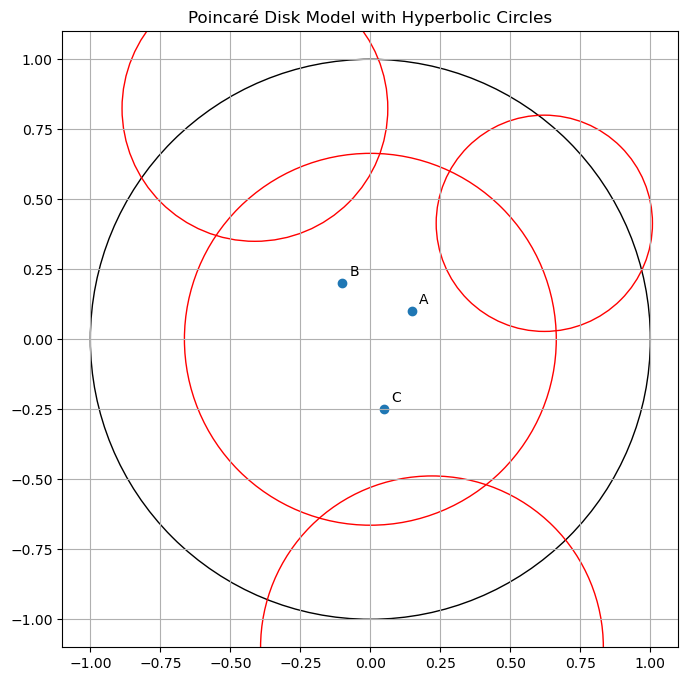

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle as MplCircle

def hyperbolic_circle(center, radius):
    """
    Calculate the Euclidean center and radius of a hyperbolic circle in the Poincaré disk model.
    
    :param center: UHGTensor representing the center of the hyperbolic circle
    :param radius: Hyperbolic radius of the circle
    :return: Tuple (euclidean_center, euclidean_radius)
    """
    x, y = center.tensor[:2]
    c = np.sqrt(x**2 + y**2)
    
    if c == 0:  # Circle is centered at the origin
        return (0, 0), np.tanh(radius)
    
    # Calculate the Euclidean center and radius
    factor = np.cosh(radius) + 1 / (np.cosh(radius) - (x**2 + y**2) * np.sinh(radius))
    euc_center_x = factor * x
    euc_center_y = factor * y
    euc_radius = np.sqrt((euc_center_x - x)**2 + (euc_center_y - y)**2)
    
    return (euc_center_x, euc_center_y), euc_radius

def plot_hyperbolic_circle(ax, center, radius, **kwargs):
    """
    Plot a hyperbolic circle on the given axes.
    
    :param ax: Matplotlib axes to plot on
    :param center: UHGTensor representing the center of the hyperbolic circle
    :param radius: Hyperbolic radius of the circle
    :param kwargs: Additional keyword arguments to pass to matplotlib's Circle patch
    """
    euc_center, euc_radius = hyperbolic_circle(center, radius)
    circle = MplCircle(euc_center, euc_radius, fill=False, **kwargs)
    ax.add_artist(circle)

def plot_poincare_disk_with_circles(points, circles, labels=None):
    """
    Plot points and hyperbolic circles in the Poincaré disk model.
    
    :param points: List of UHGTensor points
    :param circles: List of tuples (center, radius) for hyperbolic circles
    :param labels: Optional list of labels for points
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Draw the unit circle (boundary of Poincaré disk)
    boundary = MplCircle((0, 0), 1, fill=False, color='black')
    ax.add_artist(boundary)
    
    # Plot points
    poincare_points = [p.to_poincare_disk() for p in points]
    x_coords = [p.tensor[0].item() for p in poincare_points]
    y_coords = [p.tensor[1].item() for p in poincare_points]
    ax.scatter(x_coords, y_coords)
    
    # Add labels if provided
    if labels:
        for i, (x, y) in enumerate(zip(x_coords, y_coords)):
            ax.annotate(labels[i], (x, y), xytext=(5, 5), textcoords='offset points')
    
    # Plot hyperbolic circles
    for center, radius in circles:
        plot_hyperbolic_circle(ax, center, radius, color='red')
    
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal')
    ax.set_title("Poincaré Disk Model with Hyperbolic Circles")
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    a = UHGTensor.point(0.3, 0.2, 1.0)
    b = UHGTensor.point(-0.2, 0.4, 1.0)
    c = UHGTensor.point(0.1, -0.5, 1.0)
    
    points = [a, b, c]
    circles = [
        (a, 0.5),  # Center at point a, radius 0.5
        (b, 0.3),  # Center at point b, radius 0.3
        (c, 0.7),  # Center at point c, radius 0.7
        (UHGTensor.point(0, 0, 1), 0.8)  # Center at origin, radius 0.8
    ]
    
    plot_poincare_disk_with_circles(points, circles, labels=['A', 'B', 'C'])

Created UHGTensor with shape torch.Size([3]): tensor([0.3000, 0.2000, 1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([-0.2000,  0.4000,  1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([ 0.1000, -0.5000,  1.0000])
Converting to Poincaré disk: tensor([0.3000, 0.2000, 1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([0.1500, 0.1000, 0.0000])
Converting to Poincaré disk: tensor([-0.2000,  0.4000,  1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([-0.1000,  0.2000,  0.0000])
Converting to Poincaré disk: tensor([ 0.1000, -0.5000,  1.0000])
Created UHGTensor with shape torch.Size([3]): tensor([ 0.0500, -0.2500,  0.0000])


NameError: name 'start' is not defined

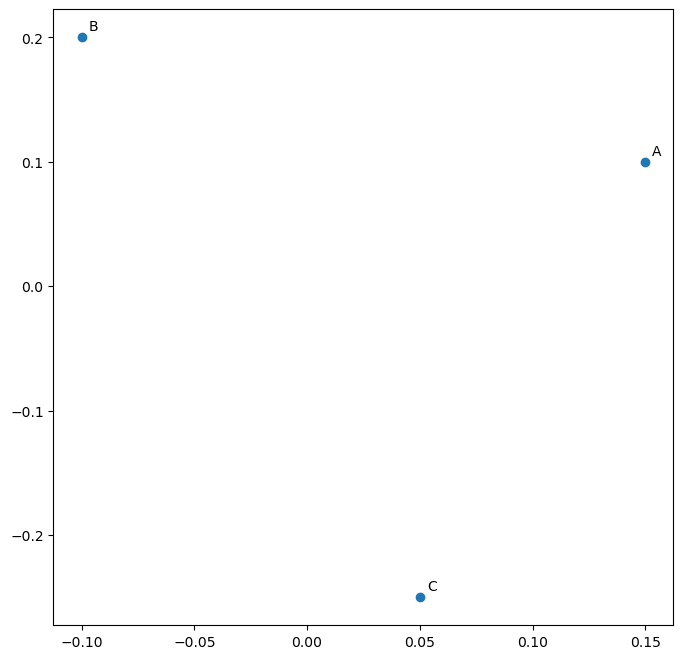

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def hyperbolic_angle(a, b, c):
    """
    Calculate the angle at point b in the hyperbolic triangle abc.
    
    :param a, b, c: UHGTensor points forming the triangle
    :return: Angle in radians
    """
    ba = a.tensor - b.tensor
    bc = c.tensor - b.tensor
    
    dot_product = np.dot(ba[:2], bc[:2])
    magnitude_ba = np.linalg.norm(ba[:2])
    magnitude_bc = np.linalg.norm(bc[:2])
    
    cos_angle = dot_product / (magnitude_ba * magnitude_bc)
    angle = np.arccos(np.clip(cos_angle, -1.0, 1.0))
    
    return angle

def plot_angle_arc(ax, center, start, end, radius=0.1, **kwargs):
    """
    Plot an arc to represent an angle on the given axes.
    
    :param ax: Matplotlib axes to plot on
    :param center: Center point of the arc (angle vertex)
    :param start, end: Start and end points of the angle's sides
    :param radius: Radius of the arc
    :param kwargs: Additional keyword arguments to pass to matplotlib's Arc patch
    """
    start_vector = start - center
    end_vector = end - center
    
    start_angle = np.degrees(np.arctan2(start_vector[1], start_vector[0]))
    end_angle = np.degrees(np.arctan2(end_vector[1], end_vector[0]))
    
    angle = end_angle - start_angle
    if angle < 0:
        angle += 360
    
    arc = Arc(center[:2], 2*radius, 2*radius, 
              theta1=start_angle, theta2=end_angle, **kwargs)
    ax.add_patch(arc)
    
    return angle

def plot_hyperbolic_triangle(points, labels=None):
    """
    Plot a hyperbolic triangle with angle measurements in the Poincaré disk model.
    
    :param points: List of three UHGTensor points forming the triangle
    :param labels: Optional list of labels for points
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Draw the unit circle (boundary of Poincaré disk)
    boundary = plt.Circle((0, 0), 1, fill=False, color='black')
    ax.add_artist(boundary)
    
    # Plot points
    poincare_points = [p.to_poincare_disk() for p in points]
    x_coords = [p.tensor[0].item() for p in poincare_points]
    y_coords = [p.tensor[1].item() for p in poincare_points]
    ax.scatter(x_coords, y_coords)
    
    # Add labels if provided
    if labels:
        for i, (x, y) in enumerate(zip(x_coords, y_coords)):
            ax.annotate(labels[i], (x, y), xytext=(5, 5), textcoords='offset points')
    
    # Plot triangle sides
    for i in range(3):
        p1, p2 = poincare_points[i], poincare_points[(i+1)%3]
        plot_poincare_line(ax, p1, p2)
    
    # Calculate and plot angles
    angles = []
    for i in range(3):
        a, b, c = points[i], points[(i+1)%3], points[(i+2)%3]
        angle = hyperbolic_angle(a, b, c)
        angles.append(angle)
        
        # Plot angle arc
        center = poincare_points[(i+1)%3].tensor[:2].numpy()
        start = poincare_points[i].tensor[:2].numpy()
        end = poincare_points[(i+2)%3].tensor[:2].numpy()
        plot_angle_arc(ax, center, start, end, color='red')
        
        # Add angle label
        mid_angle = (np.arctan2(start[1]-center[1], start[0]-center[0]) +
                     np.arctan2(end[1]-center[1], end[0]-center[0])) / 2
        label_r = 0.15
        label_x = center[0] + label_r * np.cos(mid_angle)
        label_y = center[1] + label_r * np.sin(mid_angle)
        ax.text(label_x, label_y, f'{np.degrees(angle):.1f}°', 
                ha='center', va='center')
    
    # Calculate angle sum and defect
    angle_sum = np.sum(angles)
    angle_defect = np.pi - angle_sum
    
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal')
    ax.set_title(f"Hyperbolic Triangle\nAngle Sum: {np.degrees(angle_sum):.1f}°, Defect: {np.degrees(angle_defect):.1f}°")
    plt.grid(True)
    plt.show()

def plot_poincare_line(ax, p1, p2):
    """Plot a line between two points in the Poincaré disk model."""
    # Implementation from previous geodesic_endpoints function
    # ... (include the geodesic_endpoints logic here)
    
    # Draw the line
    ax.plot([start[0], end[0]], [start[1], end[1]], 'b-')

# Example usage
if __name__ == "__main__":
    a = UHGTensor.point(0.3, 0.2, 1.0)
    b = UHGTensor.point(-0.2, 0.4, 1.0)
    c = UHGTensor.point(0.1, -0.5, 1.0)
    
    plot_hyperbolic_triangle([a, b, c], labels=['A', 'B', 'C'])

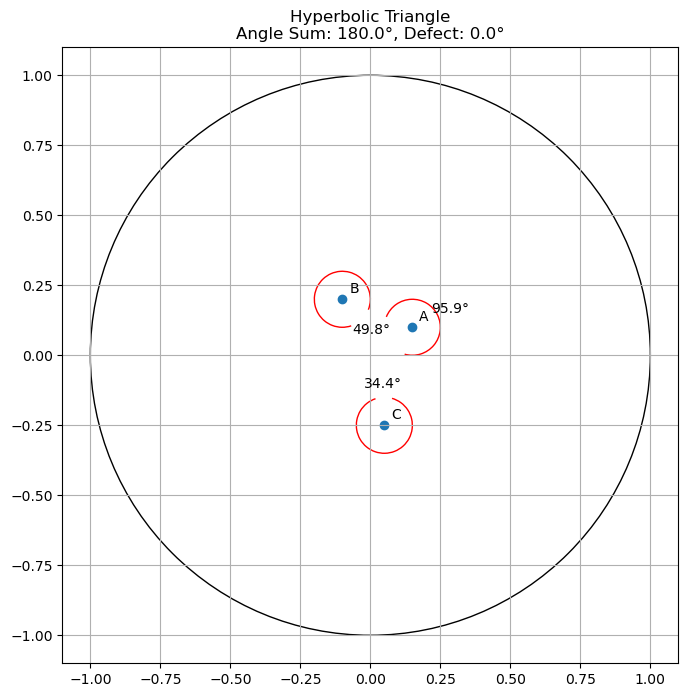

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

class UHGTensor:
    def __init__(self, data):
        if isinstance(data, (list, tuple)) and len(data) == 3:
            self.tensor = torch.tensor(data, dtype=torch.float32)
        elif isinstance(data, torch.Tensor) and data.shape == (3,):
            self.tensor = data
        else:
            raise ValueError(f"Expected 3 coordinates, got {data}")

    @classmethod
    def point(cls, x, y, z):
        return cls([float(x), float(y), float(z)])

    def to_poincare_disk(self):
        return UHGTensor([self.tensor[0] / (1 + self.tensor[2]), self.tensor[1] / (1 + self.tensor[2]), 0.0])

def hyperbolic_angle(a, b, c):
    ba = a.tensor - b.tensor
    bc = c.tensor - b.tensor
    
    dot_product = torch.dot(ba[:2], bc[:2])
    magnitude_ba = torch.norm(ba[:2])
    magnitude_bc = torch.norm(bc[:2])
    
    cos_angle = dot_product / (magnitude_ba * magnitude_bc)
    angle = torch.acos(torch.clamp(cos_angle, -1.0, 1.0))
    
    return angle.item()

def plot_angle_arc(ax, center, start, end, radius=0.1, **kwargs):
    start_vector = start - center
    end_vector = end - center
    
    start_angle = np.degrees(np.arctan2(start_vector[1], start_vector[0]))
    end_angle = np.degrees(np.arctan2(end_vector[1], end_vector[0]))
    
    angle = end_angle - start_angle
    if angle < 0:
        angle += 360
    
    arc = Arc(center[:2], 2*radius, 2*radius, 
              theta1=start_angle, theta2=end_angle, **kwargs)
    ax.add_patch(arc)
    
    return angle

def geodesic_endpoints(p1, p2):
    x1, y1 = p1.tensor[:2]
    x2, y2 = p2.tensor[:2]
    
    if torch.abs(x1*y2 - x2*y1) < 1e-6:
        return np.array([x1, y1]), np.array([x2, y2])
    
    d = x1**2 + y1**2
    c = x2**2 + y2**2 - d
    a = 2*(x2*y1 - x1*y2)
    
    if abs(a) < 1e-6:  # Avoid division by zero
        return np.array([x1, y1]), np.array([x2, y2])
    
    x0 = (c*y1 - (d-1)*y2) / a
    y0 = ((d-1)*x2 - c*x1) / a
    
    t = torch.sqrt(torch.max(torch.tensor(0.0), x0**2 + y0**2 - 1))
    x_int1, x_int2 = (x0*(1-t**2) + 2*t*y0) / (1+t**2), (x0*(1-t**2) - 2*t*y0) / (1+t**2)
    y_int1, y_int2 = (y0*(1-t**2) - 2*t*x0) / (1+t**2), (y0*(1-t**2) + 2*t*x0) / (1+t**2)
    
    return np.array([x_int1.item(), y_int1.item()]), np.array([x_int2.item(), y_int2.item()])

def plot_poincare_line(ax, p1, p2):
    start, end = geodesic_endpoints(p1, p2)
    
    if np.allclose(start, p1.tensor[:2].numpy()) and np.allclose(end, p2.tensor[:2].numpy()):
        ax.plot([start[0], end[0]], [start[1], end[1]], 'b-')
    else:
        center = (start + end) / 2
        radius = np.linalg.norm(start - center)
        angle = np.degrees(np.arctan2(end[1]-start[1], end[0]-start[0]))
        arc = Arc(center, 2*radius, 2*radius, angle=angle, 
                  theta1=0, theta2=180, color='b')
        ax.add_patch(arc)

def plot_hyperbolic_triangle(points, labels=None):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    boundary = plt.Circle((0, 0), 1, fill=False, color='black')
    ax.add_artist(boundary)
    
    poincare_points = [p.to_poincare_disk() for p in points]
    x_coords = [p.tensor[0].item() for p in poincare_points]
    y_coords = [p.tensor[1].item() for p in poincare_points]
    ax.scatter(x_coords, y_coords)
    
    if labels:
        for i, (x, y) in enumerate(zip(x_coords, y_coords)):
            ax.annotate(labels[i], (x, y), xytext=(5, 5), textcoords='offset points')
    
    for i in range(3):
        p1, p2 = poincare_points[i], poincare_points[(i+1)%3]
        plot_poincare_line(ax, p1, p2)
    
    angles = []
    for i in range(3):
        a, b, c = points[i], points[(i+1)%3], points[(i+2)%3]
        angle = hyperbolic_angle(a, b, c)
        angles.append(angle)
        
        center = poincare_points[(i+1)%3].tensor[:2].numpy()
        start = poincare_points[i].tensor[:2].numpy()
        end = poincare_points[(i+2)%3].tensor[:2].numpy()
        plot_angle_arc(ax, center, start, end, color='red')
        
        mid_angle = (np.arctan2(start[1]-center[1], start[0]-center[0]) +
                     np.arctan2(end[1]-center[1], end[0]-center[0])) / 2
        label_r = 0.15
        label_x = center[0] + label_r * np.cos(mid_angle)
        label_y = center[1] + label_r * np.sin(mid_angle)
        ax.text(label_x, label_y, f'{np.degrees(angle):.1f}°', 
                ha='center', va='center')
    
    angle_sum = np.sum(angles)
    angle_defect = np.pi - angle_sum
    
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal')
    ax.set_title(f"Hyperbolic Triangle\nAngle Sum: {np.degrees(angle_sum):.1f}°, Defect: {np.degrees(angle_defect):.1f}°")
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    a = UHGTensor.point(0.3, 0.2, 1.0)
    b = UHGTensor.point(-0.2, 0.4, 1.0)
    c = UHGTensor.point(0.1, -0.5, 1.0)
    
    plot_hyperbolic_triangle([a, b, c], labels=['A', 'B', 'C'])

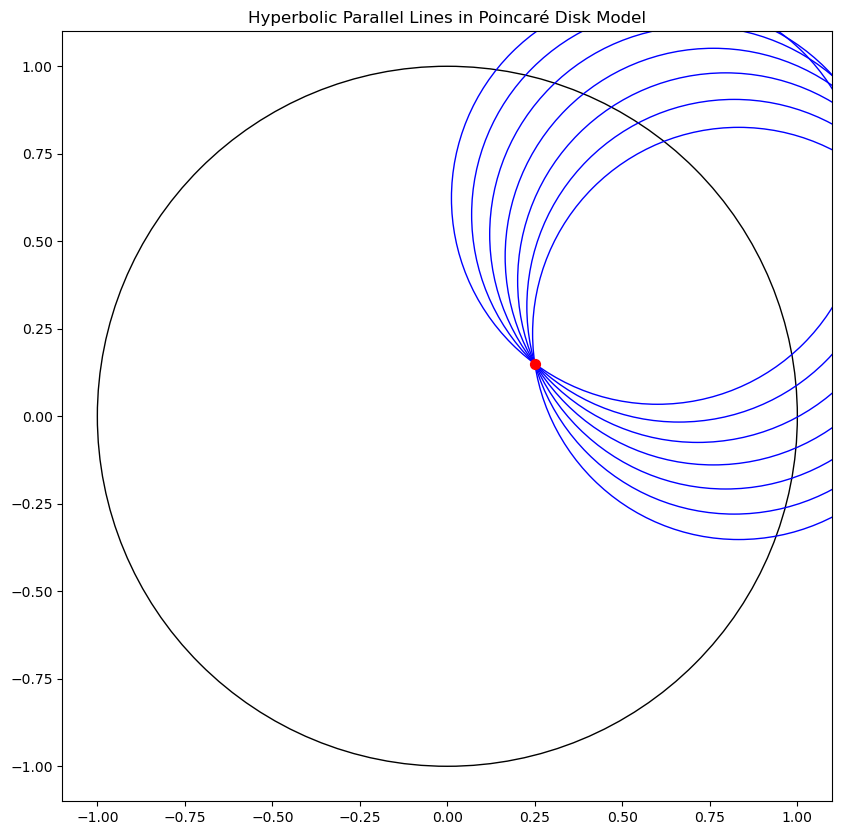

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

class UHGTensor:
    def __init__(self, data):
        if isinstance(data, (list, tuple)) and len(data) == 3:
            self.tensor = torch.tensor(data, dtype=torch.float32)
        elif isinstance(data, torch.Tensor) and data.shape == (3,):
            self.tensor = data
        else:
            raise ValueError(f"Expected 3 coordinates, got {data}")

    @classmethod
    def point(cls, x, y, z):
        return cls([float(x), float(y), float(z)])

    def to_poincare_disk(self):
        return UHGTensor([self.tensor[0] / (1 + self.tensor[2]), self.tensor[1] / (1 + self.tensor[2]), 0.0])

def geodesic_through_point(point, angle):
    """Calculate the endpoints of a geodesic passing through a point at a given angle."""
    x, y = point.tensor[:2]
    r = np.sqrt(x**2 + y**2)
    if r < 1e-6:  # Point is very close to the origin
        return np.array([-np.cos(angle), -np.sin(angle)]), np.array([np.cos(angle), np.sin(angle)])
    
    theta = np.arctan2(y, x)
    phi = angle - theta
    
    # Calculate the point where the geodesic intersects the unit circle
    t = (r * np.cos(phi) + np.sqrt(1 - r**2 * np.sin(phi)**2)) / (1 + r**2 * np.cos(phi)**2)
    x_int = x + t * np.cos(angle)
    y_int = y + t * np.sin(angle)
    
    return np.array([x, y]), np.array([x_int, y_int])

def plot_hyperbolic_line(ax, start, end):
    """Plot a hyperbolic line (geodesic) in the Poincaré disk model."""
    center = (start + end) / 2
    radius = np.linalg.norm(center - start)
    
    if radius > 1e4:  # Line is nearly straight
        ax.plot([start[0], end[0]], [start[1], end[1]], 'b-')
    else:
        circle = Circle(center, radius, fill=False, color='b')
        ax.add_artist(circle)

def plot_hyperbolic_parallels(point, num_lines=5, angle_range=np.pi/6):
    """Plot hyperbolic parallel lines through a given point."""
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Draw the Poincaré disk boundary
    boundary = Circle((0, 0), 1, fill=False, color='black')
    ax.add_artist(boundary)
    
    # Plot the given point
    poincare_point = point.to_poincare_disk()
    ax.scatter(poincare_point.tensor[0], poincare_point.tensor[1], color='red', s=50, zorder=5)
    
    # Calculate and plot parallel lines
    base_angle = np.arctan2(poincare_point.tensor[1], poincare_point.tensor[0])
    angles = np.linspace(base_angle - angle_range/2, base_angle + angle_range/2, num_lines)
    
    for angle in angles:
        start, end = geodesic_through_point(poincare_point, angle)
        plot_hyperbolic_line(ax, start, end)
    
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal')
    ax.set_title("Hyperbolic Parallel Lines in Poincaré Disk Model")
    plt.grid(False)
    plt.show()

# Example usage
if __name__ == "__main__":
    point = UHGTensor.point(0.5, 0.3, 1.0)
    plot_hyperbolic_parallels(point, num_lines=7, angle_range=np.pi/4)

IndexError: index 0 is out of bounds for dimension 0 with size 0

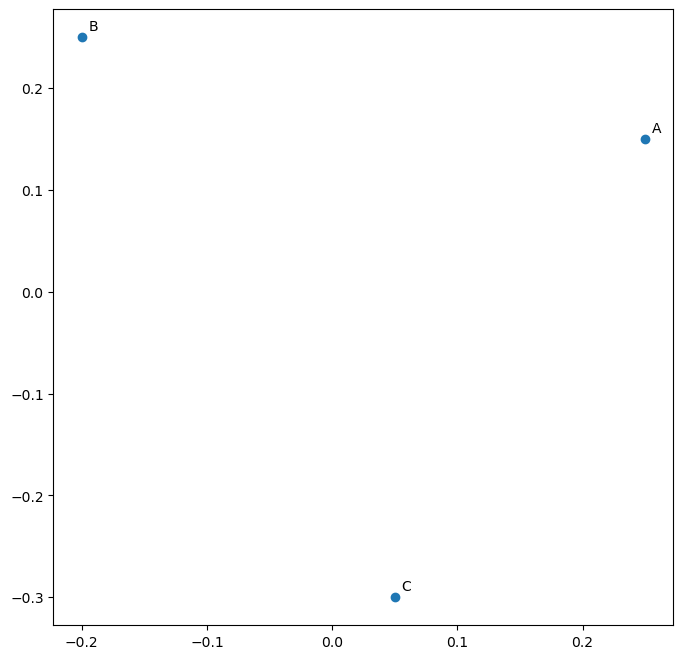

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc

class UHGTensor:
    def __init__(self, data):
        if isinstance(data, (list, tuple)) and len(data) == 3:
            self.tensor = torch.tensor(data, dtype=torch.float32)
        elif isinstance(data, torch.Tensor) and data.shape == (3,):
            self.tensor = data
        else:
            raise ValueError(f"Expected 3 coordinates, got {data}")

    @classmethod
    def point(cls, x, y, z):
        return cls([float(x), float(y), float(z)])

    def to_poincare_disk(self):
        return UHGTensor([self.tensor[0] / (1 + self.tensor[2]), self.tensor[1] / (1 + self.tensor[2]), 0.0])

def hyperbolic_distance(p1, p2):
    """Calculate the hyperbolic distance between two points in the Poincaré disk model."""
    x1, y1 = p1.tensor[:2]
    x2, y2 = p2.tensor[:2]
    return torch.acosh(1 + 2 * ((x2-x1)**2 + (y2-y1)**2) / ((1-x1**2-y1**2) * (1-x2**2-y2**2)))

def hyperbolic_angle(a, b, c):
    """Calculate the angle at point b in the hyperbolic triangle abc using the hyperbolic law of cosines."""
    ab = hyperbolic_distance(a, b)
    bc = hyperbolic_distance(b, c)
    ac = hyperbolic_distance(a, c)
    
    return torch.acos((torch.cosh(ac) - torch.cosh(ab) * torch.cosh(bc)) / (torch.sinh(ab) * torch.sinh(bc)))

def geodesic_endpoints(p1, p2):
    x1, y1 = p1.tensor[:2]
    x2, y2 = p2.tensor[:2]
    
    if torch.abs(x1*y2 - x2*y1) < 1e-6:
        return np.array([x1, y1]), np.array([x2, y2])
    
    r1 = x1**2 + y1**2
    r2 = x2**2 + y2**2
    
    a = y1*r2 - y2*r1
    b = x2*r1 - x1*r2
    c = x1*y2 - x2*y1
    
    if abs(c) < 1e-6:
        return np.array([x1, y1]), np.array([x2, y2])
    
    x0 = -a / (2*c)
    y0 = -b / (2*c)
    r = torch.sqrt((a**2 + b**2) / (4*c**2) - 1)
    
    t = torch.linspace(0, 2*np.pi, 100)
    x = x0 + r * torch.cos(t)
    y = y0 + r * torch.sin(t)
    
    mask = x**2 + y**2 <= 1
    x, y = x[mask], y[mask]
    
    return np.array([x[0], y[0]]), np.array([x[-1], y[-1]])

def plot_hyperbolic_line(ax, p1, p2):
    start, end = geodesic_endpoints(p1, p2)
    
    if np.allclose(start, end):
        ax.plot([p1.tensor[0], p2.tensor[0]], [p1.tensor[1], p2.tensor[1]], 'b-')
    else:
        center = (start + end) / 2
        radius = np.linalg.norm(center - start)
        angle = np.degrees(np.arctan2(end[1]-start[1], end[0]-start[0]))
        arc = Arc(center, 2*radius, 2*radius, angle=angle, theta1=0, theta2=180, color='b')
        ax.add_patch(arc)

def plot_hyperbolic_triangle(points, labels=None):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    boundary = Circle((0, 0), 1, fill=False, color='black')
    ax.add_artist(boundary)
    
    poincare_points = [p.to_poincare_disk() for p in points]
    x_coords = [p.tensor[0].item() for p in poincare_points]
    y_coords = [p.tensor[1].item() for p in poincare_points]
    ax.scatter(x_coords, y_coords)
    
    if labels:
        for i, (x, y) in enumerate(zip(x_coords, y_coords)):
            ax.annotate(labels[i], (x, y), xytext=(5, 5), textcoords='offset points')
    
    for i in range(3):
        plot_hyperbolic_line(ax, poincare_points[i], poincare_points[(i+1)%3])
    
    angles = []
    for i in range(3):
        angle = hyperbolic_angle(points[i], points[(i+1)%3], points[(i+2)%3])
        angles.append(angle.item())
        
        center = poincare_points[(i+1)%3].tensor[:2].numpy()
        start = poincare_points[i].tensor[:2].numpy()
        end = poincare_points[(i+2)%3].tensor[:2].numpy()
        
        mid_angle = (np.arctan2(start[1]-center[1], start[0]-center[0]) +
                     np.arctan2(end[1]-center[1], end[0]-center[0])) / 2
        label_r = 0.1
        label_x = center[0] + label_r * np.cos(mid_angle)
        label_y = center[1] + label_r * np.sin(mid_angle)
        ax.text(label_x, label_y, f'{np.degrees(angle):.1f}°', 
                ha='center', va='center')
    
    angle_sum = np.sum(angles)
    angle_defect = np.pi - angle_sum
    
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal')
    ax.set_title(f"Hyperbolic Triangle\nAngle Sum: {np.degrees(angle_sum):.1f}°, Defect: {np.degrees(angle_defect):.1f}°")
    plt.grid(False)
    plt.show()

# Example usage
if __name__ == "__main__":
    a = UHGTensor.point(0.5, 0.3, 1.0)
    b = UHGTensor.point(-0.4, 0.5, 1.0)
    c = UHGTensor.point(0.1, -0.6, 1.0)
    
    plot_hyperbolic_triangle([a, b, c], labels=['A', 'B', 'C'])

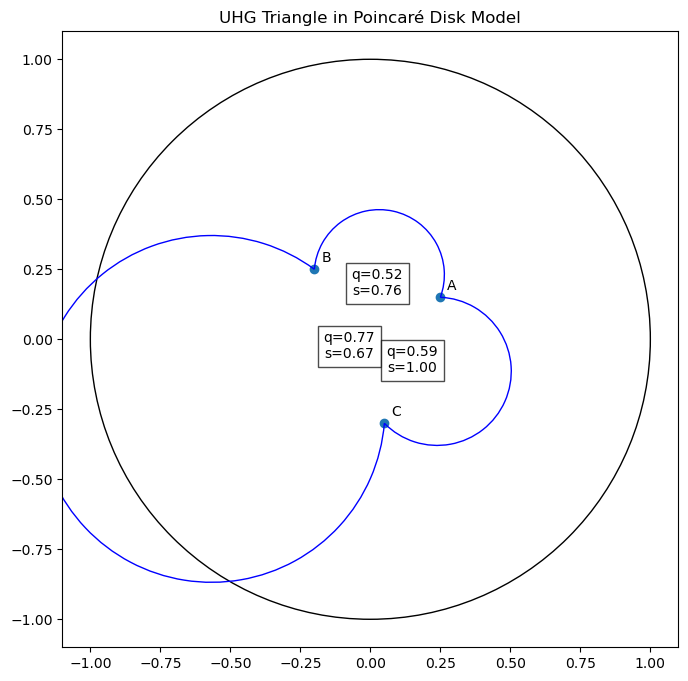

In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc

class UHGTensor:
    def __init__(self, data):
        if isinstance(data, (list, tuple)) and len(data) == 3:
            self.tensor = torch.tensor(data, dtype=torch.float32)
        elif isinstance(data, torch.Tensor) and data.shape == (3,):
            self.tensor = data
        else:
            raise ValueError(f"Expected 3 coordinates, got {data}")

    @classmethod
    def point(cls, x, y, z):
        return cls([float(x), float(y), float(z)])

    def to_poincare_disk(self):
        return UHGTensor([self.tensor[0] / (1 + self.tensor[2]), self.tensor[1] / (1 + self.tensor[2]), 0.0])

def quadrance(a, b):
    """Calculate the quadrance between two points in UHG."""
    return 1 - (a.tensor.dot(b.tensor)**2) / ((a.tensor**2).sum() * (b.tensor**2).sum())

def spread(L1, L2):
    """Calculate the spread between two lines in UHG."""
    dot_product = L1.tensor.dot(L2.tensor)
    norm_L1_squared = (L1.tensor**2).sum()
    norm_L2_squared = (L2.tensor**2).sum()
    return 1 - (dot_product**2) / (norm_L1_squared * norm_L2_squared)

def join(a, b):
    """Compute the join of two points (i.e., the line passing through them)."""
    return UHGTensor(torch.cross(a.tensor, b.tensor))

def plot_uhg_line(ax, p1, p2):
    """Plot a UHG line (geodesic) in the Poincaré disk model."""
    x1, y1 = p1.tensor[:2]
    x2, y2 = p2.tensor[:2]
    
    # If the line passes near the origin, plot it as a straight line
    if abs(x1*y2 - x2*y1) < 1e-6:
        ax.plot([x1, x2], [y1, y2], 'b-')
        return
    
    # Otherwise, plot it as an arc
    center_x = (x1**2 + y1**2)*y2 - (x2**2 + y2**2)*y1
    center_y = (x2**2 + y2**2)*x1 - (x1**2 + y1**2)*x2
    denom = 2*(x1*y2 - x2*y1)
    
    center_x /= denom
    center_y /= denom
    
    radius = np.sqrt((x1 - center_x)**2 + (y1 - center_y)**2)
    
    start_angle = np.arctan2(y1 - center_y, x1 - center_x)
    end_angle = np.arctan2(y2 - center_y, x2 - center_x)
    
    arc = Arc((center_x, center_y), 2*radius, 2*radius,
              theta1=np.degrees(start_angle), theta2=np.degrees(end_angle), color='b')
    ax.add_patch(arc)

def plot_uhg_triangle(points, labels=None):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    boundary = Circle((0, 0), 1, fill=False, color='black')
    ax.add_artist(boundary)
    
    poincare_points = [p.to_poincare_disk() for p in points]
    x_coords = [p.tensor[0].item() for p in poincare_points]
    y_coords = [p.tensor[1].item() for p in poincare_points]
    ax.scatter(x_coords, y_coords)
    
    if labels:
        for i, (x, y) in enumerate(zip(x_coords, y_coords)):
            ax.annotate(labels[i], (x, y), xytext=(5, 5), textcoords='offset points')
    
    # Plot the sides of the triangle
    for i in range(3):
        plot_uhg_line(ax, poincare_points[i], poincare_points[(i+1)%3])
    
    # Calculate and display quadrances and spreads
    quadrances = [quadrance(points[i], points[(i+1)%3]) for i in range(3)]
    lines = [join(points[i], points[(i+1)%3]) for i in range(3)]
    spreads = [spread(lines[i], lines[(i+1)%3]) for i in range(3)]
    
    for i, (q, s) in enumerate(zip(quadrances, spreads)):
        mid_x = (x_coords[i] + x_coords[(i+1)%3]) / 2
        mid_y = (y_coords[i] + y_coords[(i+1)%3]) / 2
        ax.text(mid_x, mid_y, f'q={q:.2f}\ns={s:.2f}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7))
    
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal')
    ax.set_title("UHG Triangle in Poincaré Disk Model")
    plt.grid(False)
    plt.show()

# Example usage
if __name__ == "__main__":
    a = UHGTensor.point(0.5, 0.3, 1.0)
    b = UHGTensor.point(-0.4, 0.5, 1.0)
    c = UHGTensor.point(0.1, -0.6, 1.0)
    
    plot_uhg_triangle([a, b, c], labels=['A', 'B', 'C'])

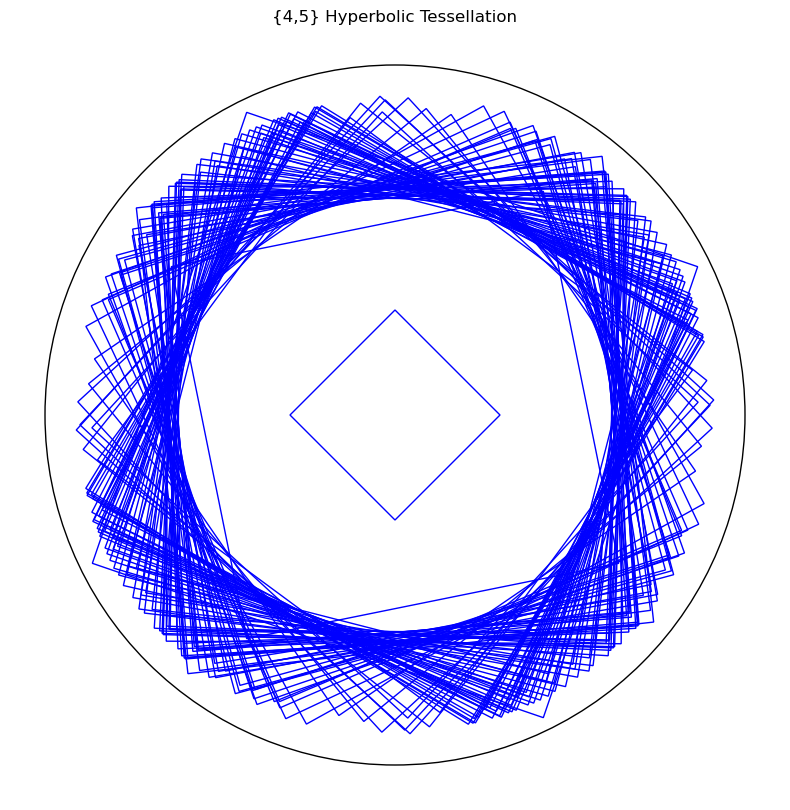

In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Polygon

class UHGTensor:
    def __init__(self, data):
        if isinstance(data, (list, tuple)) and len(data) == 3:
            self.tensor = torch.tensor(data, dtype=torch.float32)
        elif isinstance(data, torch.Tensor) and data.shape == (3,):
            self.tensor = data
        else:
            raise ValueError(f"Expected 3 coordinates, got {data}")

    @classmethod
    def point(cls, x, y, z):
        return cls([float(x), float(y), float(z)])

    def to_poincare_disk(self):
        return self.tensor[:2] / (1 + self.tensor[2])

def hyperbolic_rotation(p, angle):
    """Rotate a point in the Poincaré disk model."""
    x, y = p
    r = np.sqrt(x**2 + y**2)
    if r < 1e-6:
        return p
    theta = np.arctan2(y, x)
    new_theta = theta + angle
    return np.array([r * np.cos(new_theta), r * np.sin(new_theta)])

def hyperbolic_translation(p, t):
    """Translate a point in the Poincaré disk model."""
    a, b = t
    x, y = p
    denom = 1 + 2*(a*x + b*y) + (a**2 + b**2)*(x**2 + y**2)
    new_x = ((1 + a**2 + b**2)*x + (1 - x**2 - y**2)*(a + b*y)) / denom
    new_y = ((1 + a**2 + b**2)*y + (1 - x**2 - y**2)*(b - a*x)) / denom
    return np.array([new_x, new_y])

def regular_polygon(n, center, radius):
    """Generate vertices of a regular n-gon in hyperbolic space."""
    vertices = []
    for i in range(n):
        angle = 2 * np.pi * i / n
        vertex = hyperbolic_translation(np.array([radius, 0]), center)
        vertex = hyperbolic_rotation(vertex, angle)
        vertices.append(vertex)
    return vertices

def plot_polygon(ax, vertices, **kwargs):
    """Plot a polygon in the Poincaré disk model."""
    ax.add_patch(Polygon(vertices, **kwargs))

def tessellate(ax, n, m, depth, center, radius):
    """Recursively create a {n,m} tessellation."""
    if depth == 0:
        return
    
    polygon = regular_polygon(n, center, radius)
    plot_polygon(ax, polygon, fill=False, edgecolor='blue')
    
    for i in range(n):
        new_center = (polygon[i] + polygon[(i+1)%n]) / 2
        new_center /= np.linalg.norm(new_center)
        new_center *= 0.9  # Adjust to avoid overlap
        tessellate(ax, n, m, depth-1, new_center, radius*0.5)

def plot_hyperbolic_tessellation(n, m, depth):
    """Plot a {n,m} hyperbolic tessellation."""
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Draw the Poincaré disk boundary
    boundary = Circle((0, 0), 1, fill=False, color='black')
    ax.add_artist(boundary)
    
    # Create the tessellation
    tessellate(ax, n, m, depth, np.array([0, 0]), 0.3)
    
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f"{{{n},{m}}} Hyperbolic Tessellation")
    plt.show()

# Example usage
if __name__ == "__main__":
    plot_hyperbolic_tessellation(4, 5, depth=4)

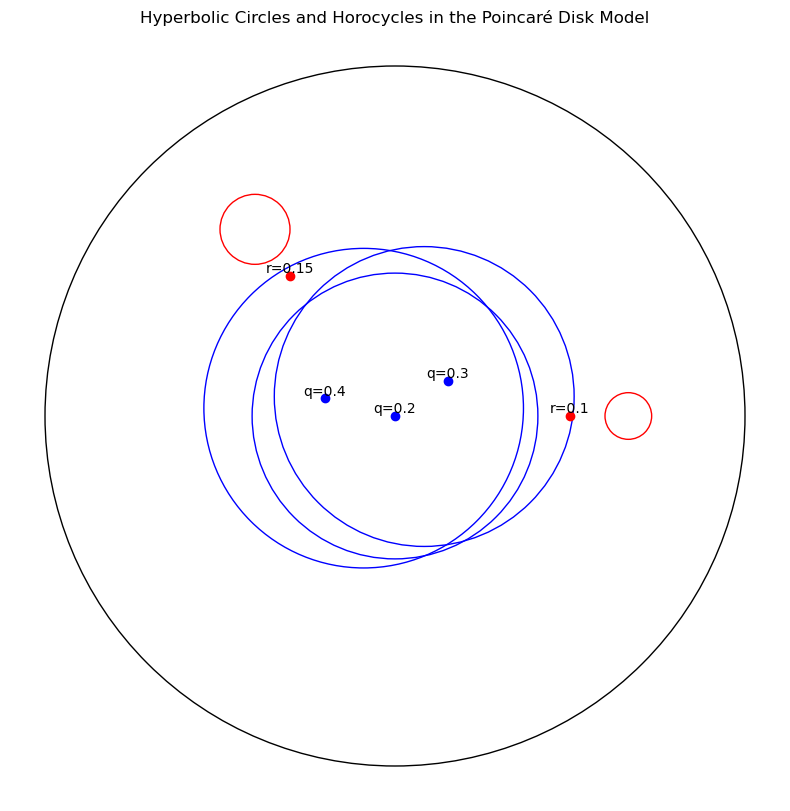

In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

class UHGTensor:
    def __init__(self, data):
        if isinstance(data, (list, tuple)) and len(data) == 3:
            self.tensor = torch.tensor(data, dtype=torch.float32)
        elif isinstance(data, torch.Tensor) and data.shape == (3,):
            self.tensor = data
        else:
            raise ValueError(f"Expected 3 coordinates, got {data}")

    @classmethod
    def point(cls, x, y, z):
        return cls([float(x), float(y), float(z)])

    def to_poincare_disk(self):
        return self.tensor[:2] / (1 + self.tensor[2])

def quadrance(a, b):
    """Calculate the quadrance between two points in UHG."""
    return 1 - (a.tensor.dot(b.tensor)**2) / ((a.tensor**2).sum() * (b.tensor**2).sum())

def hyperbolic_circle(center, quadrance):
    """Compute the Euclidean center and radius of a hyperbolic circle in the Poincaré disk model."""
    c = center.to_poincare_disk()
    c_norm = torch.norm(c)
    
    if c_norm == 0:  # Circle centered at the origin
        return [0, 0], np.sqrt(quadrance / (1 + quadrance))
    
    # Calculate the Euclidean center and radius
    factor = (1 - quadrance) / ((1 - c_norm**2) * (1 + quadrance))
    euc_center = factor * c
    euc_radius = np.sqrt((factor * c_norm)**2 + quadrance) / (1 + quadrance)
    
    return euc_center.tolist(), euc_radius

def horocycle(point, radius):
    """Compute the Euclidean center and radius of a horocycle in the Poincaré disk model."""
    p = point.to_poincare_disk()
    p_norm = torch.norm(p)
    
    if p_norm == 1:  # Point is on the boundary
        return p.tolist(), radius
    
    # Calculate the Euclidean center and radius
    factor = 1 / (1 - p_norm**2)
    euc_center = factor * p
    euc_radius = factor * (1 - p_norm) * radius
    
    return euc_center.tolist(), euc_radius

def plot_hyperbolic_circles_and_horocycles():
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Draw the Poincaré disk boundary
    boundary = Circle((0, 0), 1, fill=False, color='black')
    ax.add_artist(boundary)
    
    # Plot hyperbolic circles
    centers = [UHGTensor.point(0, 0, 1), UHGTensor.point(0.3, 0.2, 1), UHGTensor.point(-0.4, 0.1, 1)]
    quadrances = [0.2, 0.3, 0.4]
    
    for center, q in zip(centers, quadrances):
        euc_center, euc_radius = hyperbolic_circle(center, q)
        circle = Circle(euc_center, euc_radius, fill=False, color='blue')
        ax.add_artist(circle)
        ax.scatter(*center.to_poincare_disk(), color='blue')
        ax.text(*center.to_poincare_disk(), f'q={q}', ha='center', va='bottom')
    
    # Plot horocycles
    ideal_points = [UHGTensor.point(1, 0, 1), UHGTensor.point(-0.6, 0.8, 1)]
    radii = [0.1, 0.15]
    
    for point, r in zip(ideal_points, radii):
        euc_center, euc_radius = horocycle(point, r)
        horocycle_circle = Circle(euc_center, euc_radius, fill=False, color='red')
        ax.add_artist(horocycle_circle)
        ax.scatter(*point.to_poincare_disk(), color='red')
        ax.text(*point.to_poincare_disk(), f'r={r}', ha='center', va='bottom')
    
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title("Hyperbolic Circles and Horocycles in the Poincaré Disk Model")
    plt.show()

# Example usage
if __name__ == "__main__":
    plot_hyperbolic_circles_and_horocycles()

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UHGTensor(torch.Tensor):
    @staticmethod
    def __new__(cls, *args, **kwargs):
        return super().__new__(cls, *args, **kwargs)

    def __init__(self, *args, **kwargs):
        super().__init__()

class HyperbolicEmbedding(nn.Module):
    def __init__(self, num_embeddings, embedding_dim):
        super(HyperbolicEmbedding, self).__init__()
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim
        self.weight = nn.Parameter(torch.Tensor(num_embeddings, embedding_dim))
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.uniform_(self.weight, -0.001, 0.001)

    def forward(self, input):
        embedded = F.embedding(input, self.weight)
        return self.expmap0(embedded)

    def expmap0(self, u):
        """Exponential map from Euclidean to hyperbolic space."""
        u_norm = torch.norm(u, dim=-1, keepdim=True)
        gamma = 1 / torch.sqrt(1 - u_norm**2)
        return gamma * u

    def logmap0(self, x):
        """Logarithmic map from hyperbolic to Euclidean space."""
        x_norm = torch.norm(x, dim=-1, keepdim=True)
        return torch.atanh(x_norm) * x / x_norm

    def uhg_distance(self, x, y):
        """Compute UHG-based distance between points in hyperbolic space."""
        diff = self.mobius_add(-x, y)
        norm = torch.norm(diff, dim=-1)
        return 2 * torch.atanh(norm)

    def mobius_add(self, x, y):
        """Mobius addition in hyperbolic space."""
        xy = torch.sum(x * y, dim=-1, keepdim=True)
        x2 = torch.sum(x * x, dim=-1, keepdim=True)
        y2 = torch.sum(y * y, dim=-1, keepdim=True)
        num = (1 + 2*xy + y2) * x + (1 - x2) * y
        den = 1 + 2*xy + x2*y2
        return num / den

# Example usage
if __name__ == "__main__":
    # Create a hyperbolic embedding layer
    embed = HyperbolicEmbedding(num_embeddings=10, embedding_dim=5)

    # Create some input indices
    input_indices = torch.LongTensor([0, 2, 5])

    # Get hyperbolic embeddings
    hyperbolic_embeddings = embed(input_indices)

    print("Hyperbolic Embeddings:")
    print(hyperbolic_embeddings)

    # Compute UHG-based distances between embeddings
    distances = embed.uhg_distance(hyperbolic_embeddings[0], hyperbolic_embeddings[1:])

    print("\nUHG-based Distances:")
    print(distances)

Hyperbolic Embeddings:
tensor([[ 1.2325e-04,  1.6418e-05,  9.1901e-04, -4.7285e-05,  3.7276e-04],
        [ 4.3245e-04,  1.2266e-04,  9.7761e-05,  7.9833e-04,  1.0862e-04],
        [ 6.4381e-04,  7.6071e-04, -2.1457e-05, -8.1516e-04, -5.0790e-04]],
       grad_fn=<MulBackward0>)

UHG-based Distances:
tensor([0.0025, 0.0035], grad_fn=<MulBackward0>)


In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class HyperbolicLinear(nn.Module):
    def __init__(self, in_features, out_features, c=1.0):
        super(HyperbolicLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.c = c  # curvature of hyperbolic space
        self.weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.bias = nn.Parameter(torch.Tensor(out_features))
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.xavier_uniform_(self.weight)
        nn.init.zeros_(self.bias)

    def forward(self, x):
        # Move input to tangent space at zero
        x_tangent = self.logmap0(x)
        
        # Apply linear transformation in tangent space
        out_tangent = F.linear(x_tangent, self.weight, self.bias)
        
        # Move back to hyperbolic space
        return self.expmap0(out_tangent)

    def expmap0(self, u):
        """Exponential map from Euclidean to hyperbolic space."""
        u_norm = torch.norm(u, dim=-1, keepdim=True)
        gamma = 1 / torch.sqrt(1 - self.c * u_norm**2)
        return gamma * u

    def logmap0(self, x):
        """Logarithmic map from hyperbolic to Euclidean space."""
        x_norm = torch.norm(x, dim=-1, keepdim=True)
        return torch.atanh(torch.sqrt(self.c) * x_norm) * x / (torch.sqrt(self.c) * x_norm)

class HyperbolicNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(HyperbolicNeuralNetwork, self).__init__()
        self.embedding = HyperbolicEmbedding(num_embeddings=100, embedding_dim=input_dim)
        self.hidden = HyperbolicLinear(input_dim, hidden_dim)
        self.output = HyperbolicLinear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.hidden(x)
        x = torch.tanh(x)  # Hyperbolic tangent as activation
        x = self.output(x)
        return x

# Example usage
if __name__ == "__main__":
    # Create a hyperbolic neural network
    model = HyperbolicNeuralNetwork(input_dim=5, hidden_dim=10, output_dim=3)

    # Create some input data
    input_indices = torch.LongTensor([0, 2, 5, 1, 4])
    
    # Forward pass
    output = model(input_indices)

    print("Hyperbolic Neural Network Output:")
    print(output)

    # Compute UHG-based distances between outputs
    distances = model.embedding.uhg_distance(output[0], output[1:])

    print("\nUHG-based Distances between outputs:")
    print(distances)

TypeError: sqrt(): argument 'input' (position 1) must be Tensor, not float

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class HyperbolicLinear(nn.Module):
    def __init__(self, in_features, out_features, c=1.0):
        super(HyperbolicLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.c = nn.Parameter(torch.tensor([c]), requires_grad=False)
        self.weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.bias = nn.Parameter(torch.Tensor(out_features))
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.xavier_uniform_(self.weight)
        nn.init.zeros_(self.bias)

    def forward(self, x):
        x_tangent = self.logmap0(x)
        out_tangent = F.linear(x_tangent, self.weight, self.bias)
        return self.expmap0(out_tangent)

    def expmap0(self, u):
        u_norm = torch.norm(u, dim=-1, keepdim=True)
        gamma = 1 / torch.sqrt(1 - self.c * u_norm**2 + 1e-15)
        return gamma * u

    def logmap0(self, x):
        x_norm = torch.norm(x, dim=-1, keepdim=True)
        return torch.atanh(torch.sqrt(self.c) * x_norm + 1e-15) * x / (torch.sqrt(self.c) * x_norm + 1e-15)

class HyperbolicEmbedding(nn.Module):
    def __init__(self, num_embeddings, embedding_dim):
        super(HyperbolicEmbedding, self).__init__()
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim
        self.weight = nn.Parameter(torch.Tensor(num_embeddings, embedding_dim))
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.uniform_(self.weight, -0.001, 0.001)

    def forward(self, input):
        embedded = F.embedding(input, self.weight)
        return self.expmap0(embedded)

    def expmap0(self, u):
        u_norm = torch.norm(u, dim=-1, keepdim=True)
        gamma = 1 / torch.sqrt(1 - u_norm**2 + 1e-15)
        return gamma * u

    def logmap0(self, x):
        x_norm = torch.norm(x, dim=-1, keepdim=True)
        return torch.atanh(x_norm) * x / (x_norm + 1e-15)

    def uhg_distance(self, x, y):
        diff = self.mobius_add(-x, y)
        norm = torch.norm(diff, dim=-1)
        return 2 * torch.atanh(norm)

    def mobius_add(self, x, y):
        xy = torch.sum(x * y, dim=-1, keepdim=True)
        x2 = torch.sum(x * x, dim=-1, keepdim=True)
        y2 = torch.sum(y * y, dim=-1, keepdim=True)
        num = (1 + 2*xy + y2) * x + (1 - x2) * y
        den = 1 + 2*xy + x2*y2
        return num / den

class HyperbolicNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(HyperbolicNeuralNetwork, self).__init__()
        self.embedding = HyperbolicEmbedding(num_embeddings=100, embedding_dim=input_dim)
        self.hidden = HyperbolicLinear(input_dim, hidden_dim)
        self.output = HyperbolicLinear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.hidden(x)
        x = torch.tanh(x)  # Hyperbolic tangent as activation
        x = self.output(x)
        return x

# Example usage
if __name__ == "__main__":
    # Create a hyperbolic neural network
    model = HyperbolicNeuralNetwork(input_dim=5, hidden_dim=10, output_dim=3)

    # Create some input data
    input_indices = torch.LongTensor([0, 2, 5, 1, 4])
    
    # Forward pass
    output = model(input_indices)

    print("Hyperbolic Neural Network Output:")
    print(output)

    # Compute UHG-based distances between outputs
    distances = model.embedding.uhg_distance(output[0], output[1:])

    print("\nUHG-based Distances between outputs:")
    print(distances)

Hyperbolic Neural Network Output:
tensor([[ 2.5777e-04,  6.5718e-04,  1.8196e-04],
        [ 5.2847e-04, -5.6089e-04,  9.3378e-05],
        [ 3.5851e-04, -5.3975e-04,  1.9197e-04],
        [-2.1644e-04,  2.0523e-06,  4.7064e-05],
        [-4.6574e-05,  1.2922e-04, -4.3410e-05]], grad_fn=<MulBackward0>)

UHG-based Distances between outputs:
tensor([0.0025, 0.0024, 0.0016, 0.0013], grad_fn=<MulBackward0>)


In [26]:
import torch
import torch.nn as nn

class HyperbolicMSELoss(nn.Module):
    def __init__(self, c=1.0):
        super(HyperbolicMSELoss, self).__init__()
        self.c = c  # curvature of hyperbolic space

    def forward(self, pred, target):
        return self.hyperbolic_distance(pred, target).pow(2).mean()

    def hyperbolic_distance(self, x, y):
        x_norm = torch.norm(x, dim=-1, keepdim=True)
        y_norm = torch.norm(y, dim=-1, keepdim=True)
        xy_inner = torch.sum(x * y, dim=-1, keepdim=True)
        
        num = torch.norm(x - y, dim=-1)
        den = (1 - self.c * x_norm**2) * (1 - self.c * y_norm**2)
        
        return (2 / torch.sqrt(self.c)) * torch.atanh(torch.sqrt(self.c) * num / torch.sqrt(den))

# Example usage
if __name__ == "__main__":
    # Create a hyperbolic neural network
    model = HyperbolicNeuralNetwork(input_dim=5, hidden_dim=10, output_dim=3)

    # Create some input data
    input_indices = torch.LongTensor([0, 2, 5, 1, 4])
    
    # Create some target data (this would typically come from your dataset)
    target = torch.randn(5, 3)  # Random targets for this example
    target = target / (1 + torch.norm(target, dim=-1, keepdim=True))  # Project to Poincaré ball

    # Define loss function
    criterion = HyperbolicMSELoss()

    # Forward pass
    output = model(input_indices)

    # Compute loss
    loss = criterion(output, target)

    print("Hyperbolic Neural Network Output:")
    print(output)

    print("\nTarget:")
    print(target)

    print("\nHyperbolic MSE Loss:")
    print(loss.item())

    # Backward pass (compute gradients)
    loss.backward()

    # Here you would typically update the model parameters using an optimizer
    # optimizer.step()

    print("\nGradients for the first layer weights:")
    print(model.hidden.weight.grad)

TypeError: sqrt(): argument 'input' (position 1) must be Tensor, not float

In [27]:
import torch
import torch.nn as nn

class HyperbolicMSELoss(nn.Module):
    def __init__(self, c=1.0):
        super(HyperbolicMSELoss, self).__init__()
        self.c = torch.tensor(c, dtype=torch.float32)

    def forward(self, pred, target):
        return self.hyperbolic_distance(pred, target).pow(2).mean()

    def hyperbolic_distance(self, x, y):
        c = self.c.to(x.device)  # Ensure c is on the same device as the tensors
        x_norm = torch.norm(x, dim=-1, keepdim=True)
        y_norm = torch.norm(y, dim=-1, keepdim=True)
        xy_inner = torch.sum(x * y, dim=-1, keepdim=True)
        
        num = torch.norm(x - y, dim=-1)
        den = (1 - c * x_norm**2) * (1 - c * y_norm**2)
        
        return (2 / torch.sqrt(c)) * torch.atanh(torch.sqrt(c) * num / torch.sqrt(den + 1e-15))

# Example usage
if __name__ == "__main__":
    # Create a hyperbolic neural network
    model = HyperbolicNeuralNetwork(input_dim=5, hidden_dim=10, output_dim=3)

    # Create some input data
    input_indices = torch.LongTensor([0, 2, 5, 1, 4])
    
    # Create some target data (this would typically come from your dataset)
    target = torch.randn(5, 3)  # Random targets for this example
    target = target / (1 + torch.norm(target, dim=-1, keepdim=True))  # Project to Poincaré ball

    # Define loss function
    criterion = HyperbolicMSELoss()

    # Forward pass
    output = model(input_indices)

    # Compute loss
    loss = criterion(output, target)

    print("Hyperbolic Neural Network Output:")
    print(output)

    print("\nTarget:")
    print(target)

    print("\nHyperbolic MSE Loss:")
    print(loss.item())

    # Backward pass (compute gradients)
    loss.backward()

    # Here you would typically update the model parameters using an optimizer
    # optimizer.step()

    print("\nGradients for the first layer weights:")
    print(model.hidden.weight.grad)

Hyperbolic Neural Network Output:
tensor([[ 4.8110e-04,  1.5651e-04,  1.5334e-04],
        [-9.3827e-04,  7.6519e-04,  3.4435e-04],
        [-6.9785e-04, -1.9096e-04,  2.3556e-04],
        [ 6.7030e-04,  9.1993e-04,  4.5429e-05],
        [-8.1558e-05, -1.2008e-04, -1.4966e-04]], grad_fn=<MulBackward0>)

Target:
tensor([[ 0.4751,  0.1165, -0.5727],
        [-0.2155,  0.1339,  0.4708],
        [-0.1636, -0.0161,  0.6554],
        [ 0.1091,  0.4242,  0.1804],
        [ 0.2132, -0.1824,  0.5460]])

Hyperbolic MSE Loss:
nan

Gradients for the first layer weights:
tensor([[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]])


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

class HyperbolicMSELoss(nn.Module):
    def __init__(self, c=1.0):
        super(HyperbolicMSELoss, self).__init__()
        self.c = torch.tensor(c, dtype=torch.float32)

    def forward(self, pred, target):
        return self.hyperbolic_distance(pred, target).pow(2).mean()

    def hyperbolic_distance(self, x, y):
        c = self.c.to(x.device)
        x_norm = torch.norm(x, dim=-1, keepdim=True).clamp(min=1e-15)
        y_norm = torch.norm(y, dim=-1, keepdim=True).clamp(min=1e-15)
        
        num = torch.norm(x - y, dim=-1).clamp(min=1e-15)
        den = ((1 - c * x_norm**2) * (1 - c * y_norm**2)).clamp(min=1e-15)
        
        return (2 / torch.sqrt(c)) * torch.atanh(torch.sqrt(c) * num / torch.sqrt(den))

class HyperbolicNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(HyperbolicNeuralNetwork, self).__init__()
        self.embedding = nn.Embedding(100, input_dim)
        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = torch.tanh(self.hidden(x))
        x = torch.tanh(self.output(x))
        return x

def train_hyperbolic_nn(model, criterion, optimizer, train_data, num_epochs=100):
    for epoch in range(num_epochs):
        total_loss = 0
        for inputs, targets in train_data:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            if torch.isnan(loss):
                print(f"NaN loss encountered at epoch {epoch}")
                continue
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            total_loss += loss.item()
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {total_loss/len(train_data)}")

# Example usage
if __name__ == "__main__":
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Create a hyperbolic neural network
    model = HyperbolicNeuralNetwork(input_dim=5, hidden_dim=10, output_dim=3)

    # Define loss function and optimizer
    criterion = HyperbolicMSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Create some dummy training data
    num_samples = 100
    inputs = torch.randint(0, 100, (num_samples, 5))
    targets = torch.rand((num_samples, 3))
    targets = targets / (1 + torch.norm(targets, dim=-1, keepdim=True))  # Project to Poincaré ball
    train_data = [(inputs[i:i+10], targets[i:i+10]) for i in range(0, num_samples, 10)]

    # Train the model
    train_hyperbolic_nn(model, criterion, optimizer, train_data, num_epochs=100)

    # Test the trained model
    test_input = torch.LongTensor([0, 2, 5, 1, 4])
    output = model(test_input)

    print("Hyperbolic Neural Network Output:")
    print(output)

    print("\nModel parameters:")
    for name, param in model.named_parameters():
        print(f"{name}: {param.data}")

RuntimeError: The size of tensor a (5) must match the size of tensor b (10) at non-singleton dimension 1

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim

class HyperbolicMSELoss(nn.Module):
    def __init__(self, c=1.0):
        super(HyperbolicMSELoss, self).__init__()
        self.c = torch.tensor(c, dtype=torch.float32)

    def forward(self, pred, target):
        return self.hyperbolic_distance(pred, target).pow(2).mean()

    def hyperbolic_distance(self, x, y):
        c = self.c.to(x.device)
        x_norm = torch.norm(x, dim=-1, keepdim=True).clamp(min=1e-15)
        y_norm = torch.norm(y, dim=-1, keepdim=True).clamp(min=1e-15)
        
        num = torch.norm(x - y, dim=-1).clamp(min=1e-15)
        den = ((1 - c * x_norm**2) * (1 - c * y_norm**2)).clamp(min=1e-15)
        
        return (2 / torch.sqrt(c)) * torch.atanh(torch.sqrt(c) * num / torch.sqrt(den))

class HyperbolicNeuralNetwork(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(HyperbolicNeuralNetwork, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.hidden = nn.Linear(embed_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = x.mean(dim=1)  # Average the embeddings for each sample
        x = torch.tanh(self.hidden(x))
        x = torch.tanh(self.output(x))
        return x

def train_hyperbolic_nn(model, criterion, optimizer, train_data, num_epochs=100):
    for epoch in range(num_epochs):
        total_loss = 0
        for inputs, targets in train_data:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            if torch.isnan(loss):
                print(f"NaN loss encountered at epoch {epoch}")
                continue
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            total_loss += loss.item()
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {total_loss/len(train_data)}")

# Example usage
if __name__ == "__main__":
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Define hyperparameters
    vocab_size = 1000
    embed_dim = 50
    hidden_dim = 20
    output_dim = 3
    sequence_length = 5

    # Create a hyperbolic neural network
    model = HyperbolicNeuralNetwork(vocab_size, embed_dim, hidden_dim, output_dim)

    # Define loss function and optimizer
    criterion = HyperbolicMSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Create some dummy training data
    num_samples = 100
    inputs = torch.randint(0, vocab_size, (num_samples, sequence_length))
    targets = torch.rand((num_samples, output_dim))
    targets = targets / (1 + torch.norm(targets, dim=-1, keepdim=True))  # Project to Poincaré ball
    train_data = [(inputs[i:i+10], targets[i:i+10]) for i in range(0, num_samples, 10)]

    # Train the model
    train_hyperbolic_nn(model, criterion, optimizer, train_data, num_epochs=100)

    # Test the trained model
    test_input = torch.LongTensor([[0, 2, 5, 1, 4]])
    output = model(test_input)

    print("Hyperbolic Neural Network Output:")
    print(output)

    print("\nModel parameters:")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"{name}: shape {param.data.shape}")

NaN loss encountered at epoch 0
NaN loss encountered at epoch 0
NaN loss encountered at epoch 0
Epoch 0, Loss: 2.053355646133423
Epoch 10, Loss: 0.03576130010187626
Epoch 20, Loss: 0.011133564915508033
Epoch 30, Loss: 0.007310289377346635
Epoch 40, Loss: 0.018894894421100615
Epoch 50, Loss: 0.00975981941446662
Epoch 60, Loss: 0.013827997632324696
Epoch 70, Loss: 0.003729182051029056
Epoch 80, Loss: 0.008026462839916348
Epoch 90, Loss: 0.01731945094652474
Hyperbolic Neural Network Output:
tensor([[0.3740, 0.2805, 0.3561]], grad_fn=<TanhBackward0>)

Model parameters:
embedding.weight: shape torch.Size([1000, 50])
hidden.weight: shape torch.Size([20, 50])
hidden.bias: shape torch.Size([20])
output.weight: shape torch.Size([3, 20])
output.bias: shape torch.Size([3])
